<a href="https://colab.research.google.com/github/IbrahimTGhanem/DiabetesPrediction/blob/main/Analysis_of_Toronto_Only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Designing a Contextual-Risk-Prediction Model for Type 2 Diabetes Using Machine Learning**

**Section 1: Introduction**

**1.1: Importing Libraries and exploring data**

In [ ]:
pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 692.2 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
import statsmodels.api as sm
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from category_encoders import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import make_scorer
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import plot_tree
warnings.filterwarnings('ignore')

from sklearn.svm import SVC

In [ ]:
data = pd.read_csv("./Toronto Only.csv")
print(data.shape)

(570, 32)


In [ ]:
# View the first few rows of the dataset
data.head()

,Spatial ID,Diabetes Type 2 rate,Diabetes,Mental Health Score,Mental Health Binary,High Education Rate,Rate of Regular alcohol,Rate of Daily Smokers,Food Insecurity score,Food Insecurity binary,...,Residential Instability,Residential Instability quintiles,Average Income,Rented Rate,Active transportation,Total Population,Overweight,Obese,Material Deprivation,Material Deprivation quintiles
0,5350008.01,0.4412,0,4.060299,0,71.9125,76.4352,7.9608,1.073641,0,...,2.919143,5,133562.8154,55.5145,60.8825,9098,42.2847,12.0872,-1.961844,1
1,5350012.03,1.2016,0,3.984400,0,78.7903,79.3103,8.6251,1.092995,0,...,2.815386,5,134599.2243,62.5932,58.3140,10854,37.6949,14.5515,-1.783565,1
2,5350013.02,3.6271,0,4.006099,0,77.1491,73.6466,8.3142,1.067449,0,...,2.660014,5,178134.7146,50.9602,52.9334,10862,39.4208,14.9377,-1.605066,1
3,5350003.00,7.3599,0,3.951950,0,62.5397,66.9260,8.9083,1.089096,0,...,2.388299,5,103790.1244,38.1295,56.6098,1226,41.3378,15.4334,-1.523984,1
4,5350050.03,4.7061,0,4.155440,0,68.3206,69.7658,8.3155,1.030935,0,...,1.353882,5,171572.9785,27.6490,58.2392,1149,42.9872,16.1322,-1.507887,1


In [ ]:
description = data.describe()
description

,Spatial ID,Diabetes Type 2 rate,Diabetes,Mental Health Score,Mental Health Binary,High Education Rate,Rate of Regular alcohol,Rate of Daily Smokers,Food Insecurity score,Food Insecurity binary,...,Residential Instability,Residential Instability quintiles,Average Income,Rented Rate,Active transportation,Total Population,Overweight,Obese,Material Deprivation,Material Deprivation quintiles
count,5.700000e+02,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,...,570.000000,570.000000,5.700000e+02,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,5.350222e+06,7.753232,0.207018,3.898457,0.422807,46.968775,50.165168,9.917461,1.140988,0.464912,...,0.581910,3.736842,1.403747e+05,43.455188,55.340830,5288.561404,30.151913,17.589312,0.267104,3.394737
std,1.206895e+02,3.495295,0.405524,0.146632,0.494439,17.095274,12.321996,4.242612,0.083372,0.499205,...,0.964804,1.157634,1.127546e+05,22.210406,6.901984,2420.072797,5.554413,4.023235,1.037468,1.490559
min,5.350001e+06,0.000000,0.000000,3.449877,0.000000,8.145900,26.467300,2.245900,1.011765,0.000000,...,-1.558415,1.000000,4.506773e+04,0.010000,37.862500,90.000000,13.242700,5.422700,-1.961844,1.000000
25%,5.350118e+06,5.227875,0.000000,3.806450,0.000000,32.877525,39.805650,6.807675,1.069934,0.000000,...,-0.094221,3.000000,9.067819e+04,25.874475,50.458025,3770.250000,26.538550,15.065600,-0.525516,2.000000
50%,5.350240e+06,7.949050,0.000000,3.914280,0.000000,45.937950,48.252500,8.932450,1.130566,0.000000,...,0.425868,4.000000,1.090389e+05,41.773400,55.698200,5087.500000,30.673500,18.230600,0.204094,4.000000
75%,5.350317e+06,10.131875,0.000000,4.009029,1.000000,61.432850,59.913475,12.661625,1.203470,1.000000,...,1.094943,5.000000,1.430183e+05,58.673250,59.358175,6458.500000,33.799125,20.382675,0.893994,5.000000
max,5.350802e+06,19.800900,1.000000,4.199644,1.000000,81.938000,79.310300,23.152900,1.388599,1.000000,...,3.398448,5.000000,1.127636e+06,100.000000,80.388100,28078.000000,44.067700,30.556600,4.197645,5.000000


In [ ]:
# Checking for missing values
print(data.isnull().sum())

Spatial ID                           0
Diabetes Type 2 rate                 0
Diabetes                             0
Mental Health Score                  0
Mental Health Binary                 0
High Education Rate                  0
Rate of Regular alcohol              0
Rate of Daily Smokers                0
Food Insecurity score                0
Food Insecurity binary               0
Unemployment Rate                    0
Median Age                           0
Recent Immigrant Rate                0
Work Stress Score                    0
Work Stress binary                   0
Rate of Active population            0
Visible Minority Rate                0
Visible Minority Binary              0
Low-income Rate                      0
Low-income Binary                    0
Ethnic Concentration                 0
Ethnic Concentration quintiles       0
Residential Instability              0
Residential Instability quintiles    0
Average Income                       0
Rented Rate              

**1.2: Process of omitting irrelevant columns (ensuring high data quality)**

In [ ]:
identifiers_to_drop = ['Spatial ID']
data = data.drop(columns=identifiers_to_drop)

In [ ]:
Continous_label = ['Diabetes Type 2 rate']
data = data.drop(columns=Continous_label)

In [ ]:
population = ['Total Population']
data = data.drop(columns=population)

**Section 2: Data Engineering Process**

In [ ]:
# Listing of binary variables
binary_variables = [
    "Visible Minority Binary",
    "Food Insecurity binary",
    "Work Stress binary",
    "Low-income Binary",
    "Mental Health Binary"
]

In [ ]:
categorical_variables = ['Residential Instability quintiles', 'Material Deprivation quintiles', 'Ethnic Concentration quintiles']

In [ ]:
Numeric_variables = ['Ethnic Concentration', 'Material Deprivation', 'Residential Instability', 'Unemployment Rate', 'Obese', 'Low-income Rate', 'Mental Health Score',
                      'Overweight', 'Food Insecurity score', 'Rate of Daily Smokers', 'Rate of Active population', 'Active transportation', 'Rate of Regular alcohol', 'Recent Immigrant Rate',
                      'Work Stress Score', 'Visible Minority Rate', 'Rented Rate', 'Median Age', 'Average Income', 'High Education Rate']

In [ ]:
data['Diabetes Label'] = np.where(data['Diabetes'] == 1, 'High', 'Low')



**2.2 Visualization variables, correlation, and understanding outliers**

**2.2.1 Visualizing Variables**

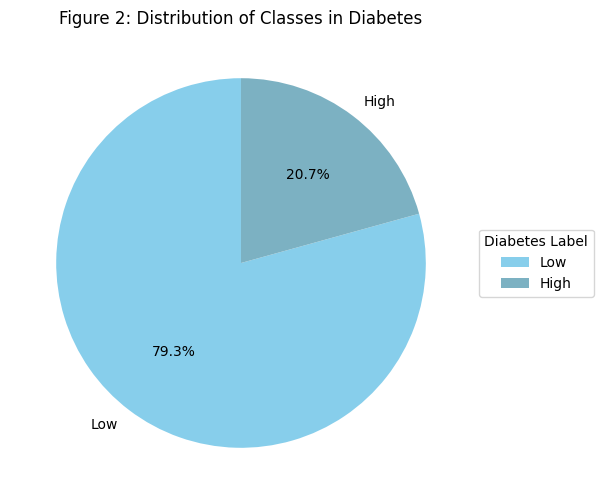

In [ ]:
# Calculating counts
counts = data['Diabetes Label'].value_counts()

# Defining colors
colors = ['#87CEEB', '#7cb1c2']

# Ploting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Figure 2: Distribution of Classes in Diabetes')
plt.legend(title='Diabetes Label', loc='center left', bbox_to_anchor=(1, 0.5))

# Showing the plot
plt.show()


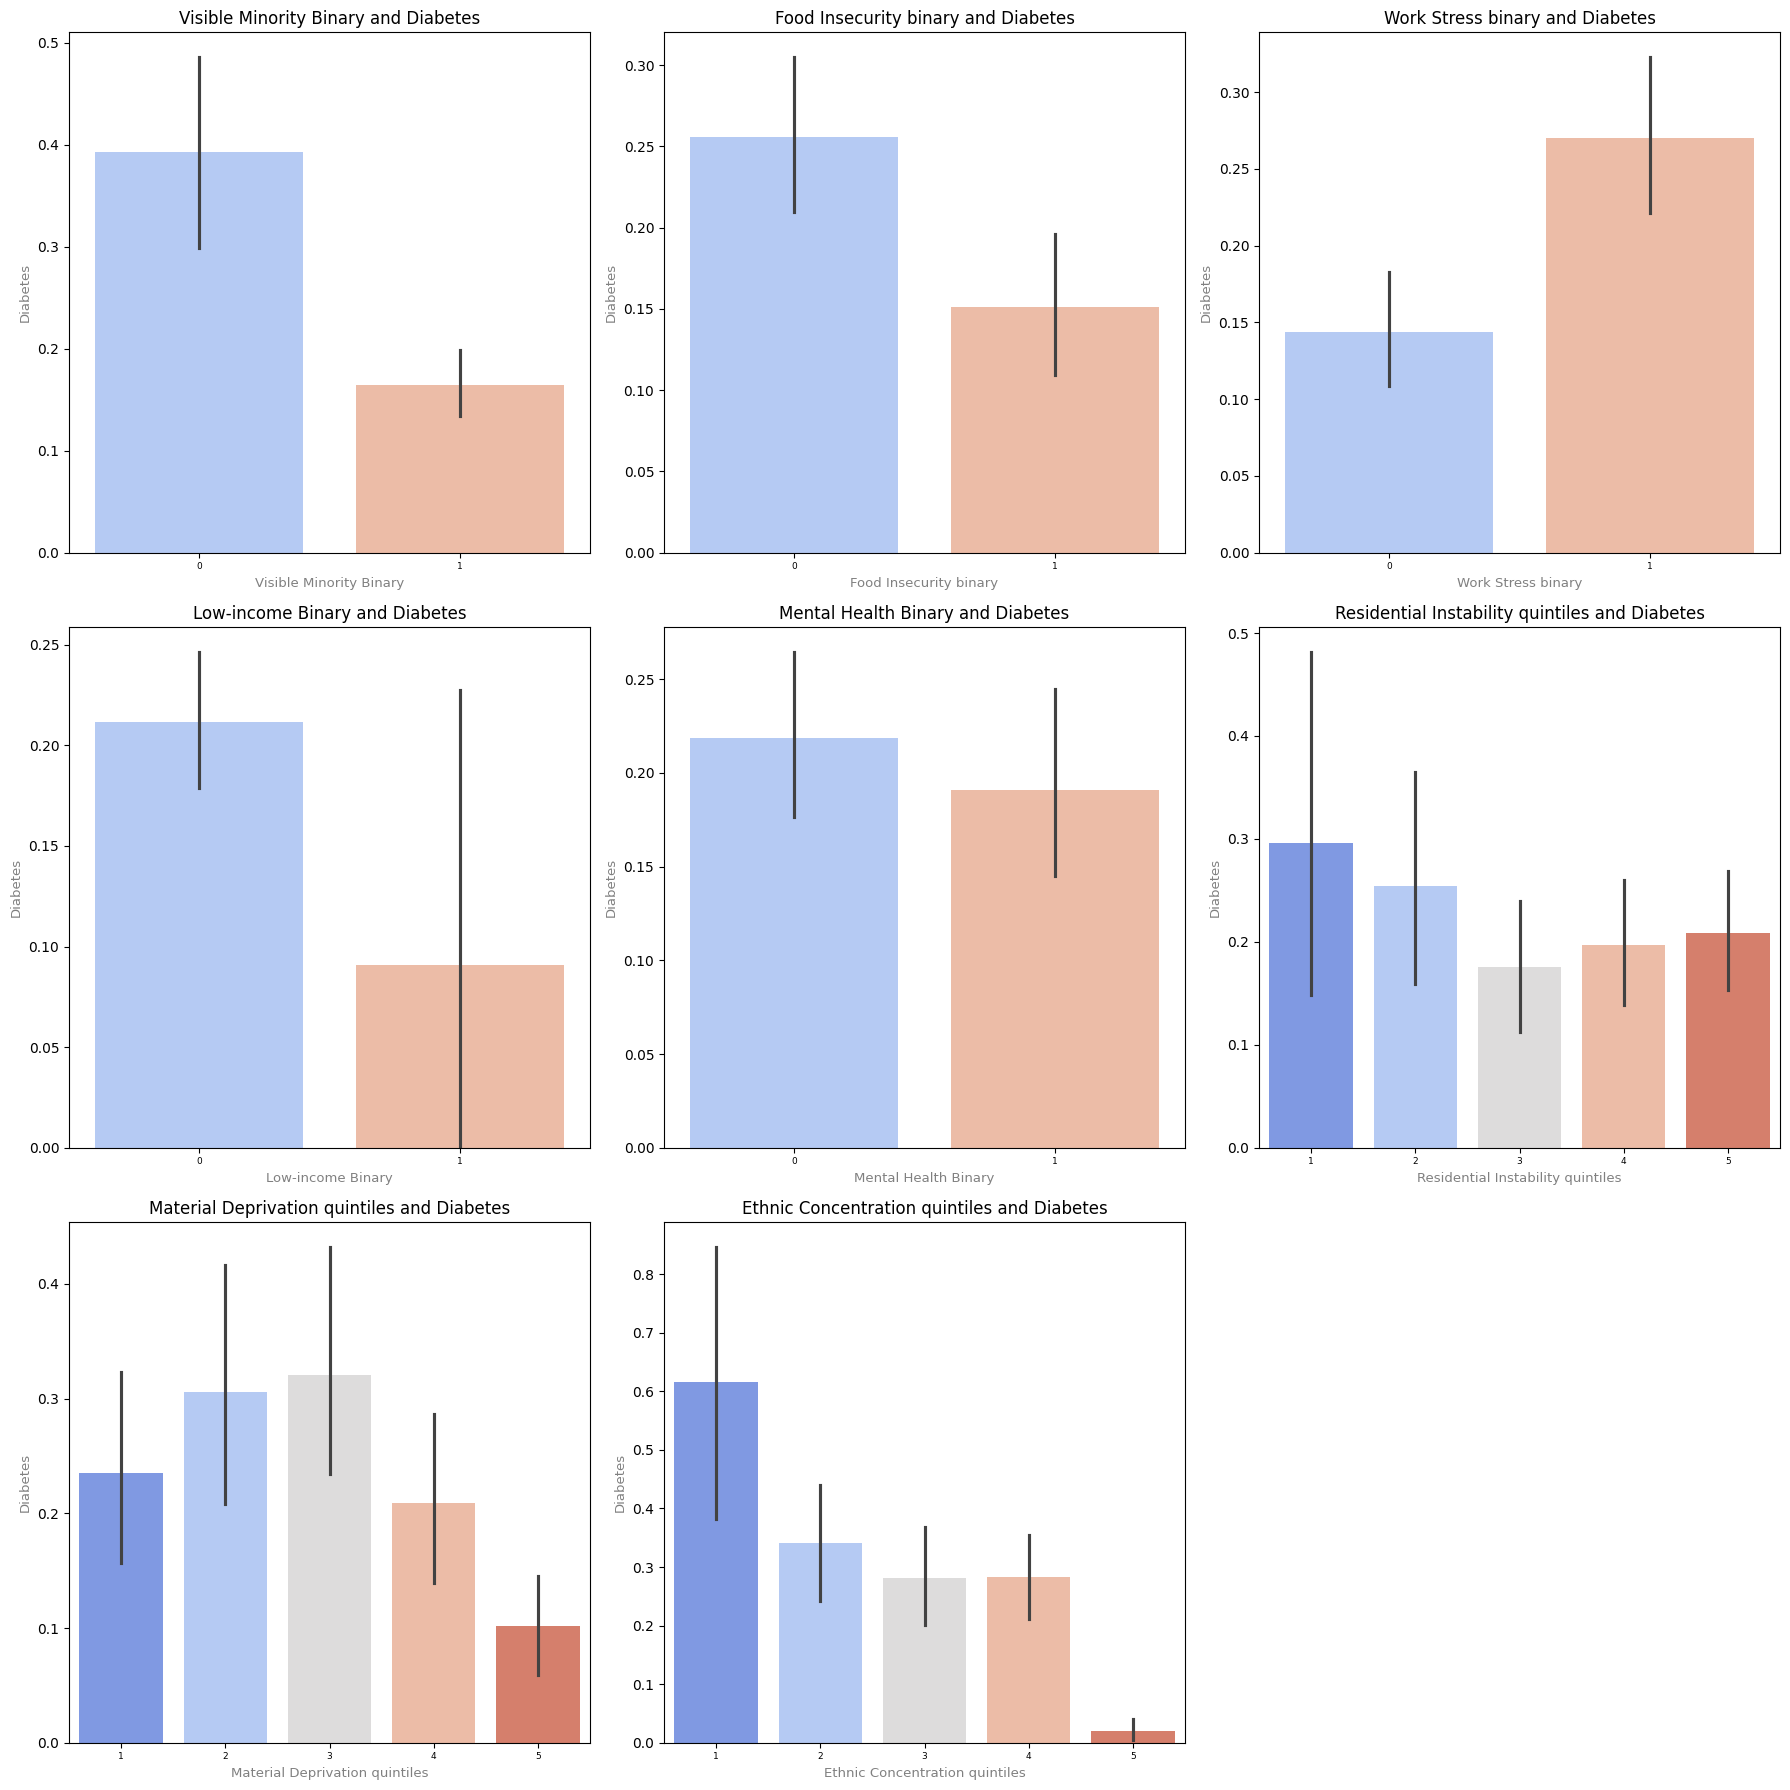

In [ ]:
# Grouping variables into binary, ordinal, and categorical
binary_categorical = binary_variables + categorical_variables

#Setting Y/class

Class= 'Diabetes'

# Determining the number of subplots in each row
subplots_per_row = 3
total_rows = len(binary_categorical) // subplots_per_row + 1

# Creating bar plots
fig, axes = plt.subplots(total_rows, subplots_per_row, figsize=(18, 6 * total_rows))

for i, variable_name in enumerate(binary_categorical):
    row = i // subplots_per_row
    col = i % subplots_per_row
    sns.barplot(data=data, x=variable_name, y=Class, palette='coolwarm', ax=axes[row, col])
    axes[row, col].set_title(f"{variable_name} and {Class}")

# Adjusting the font size for unit names
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), fontsize=6.5)

# Adding and adjusting lables for both axes
for row in axes:
    for ax in row:
        ax.set_xlabel(ax.get_xlabel(), color='grey', fontsize=9.5)
        ax.set_ylabel(ax.get_ylabel(), color='grey', fontsize=9.5)

# Removing  empty subplots
for i in range(len(binary_categorical), total_rows * subplots_per_row):
    fig.delaxes(axes[i // subplots_per_row, i % subplots_per_row])

plt.tight_layout()
plt.show()

In [ ]:
data['Instability_Deprivation'] = (data['Material Deprivation quintiles'] == 3) & (data['Residential Instability quintiles'] == 1)

data['Instability_Deprivation'] = data['Instability_Deprivation'].astype(int)

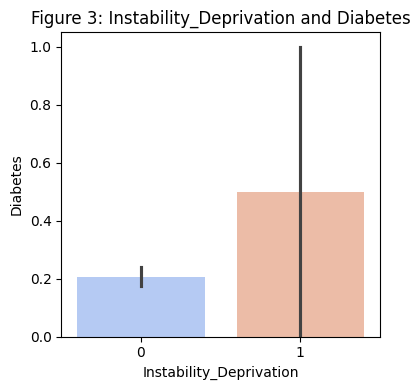

In [ ]:
#Visualizing the new interaction term
fig, axes = plt.subplots(1, 1, figsize=(4, 4))

# Plot the subplot
sns.barplot(data=data, x="Instability_Deprivation", y="Diabetes", palette='coolwarm', ax=axes)
axes.set_title("Figure 3: Instability_Deprivation and Diabetes")

# Adjust the layout and display the plot
plt.tight_layout()

# Visualize the plot
plt.show()

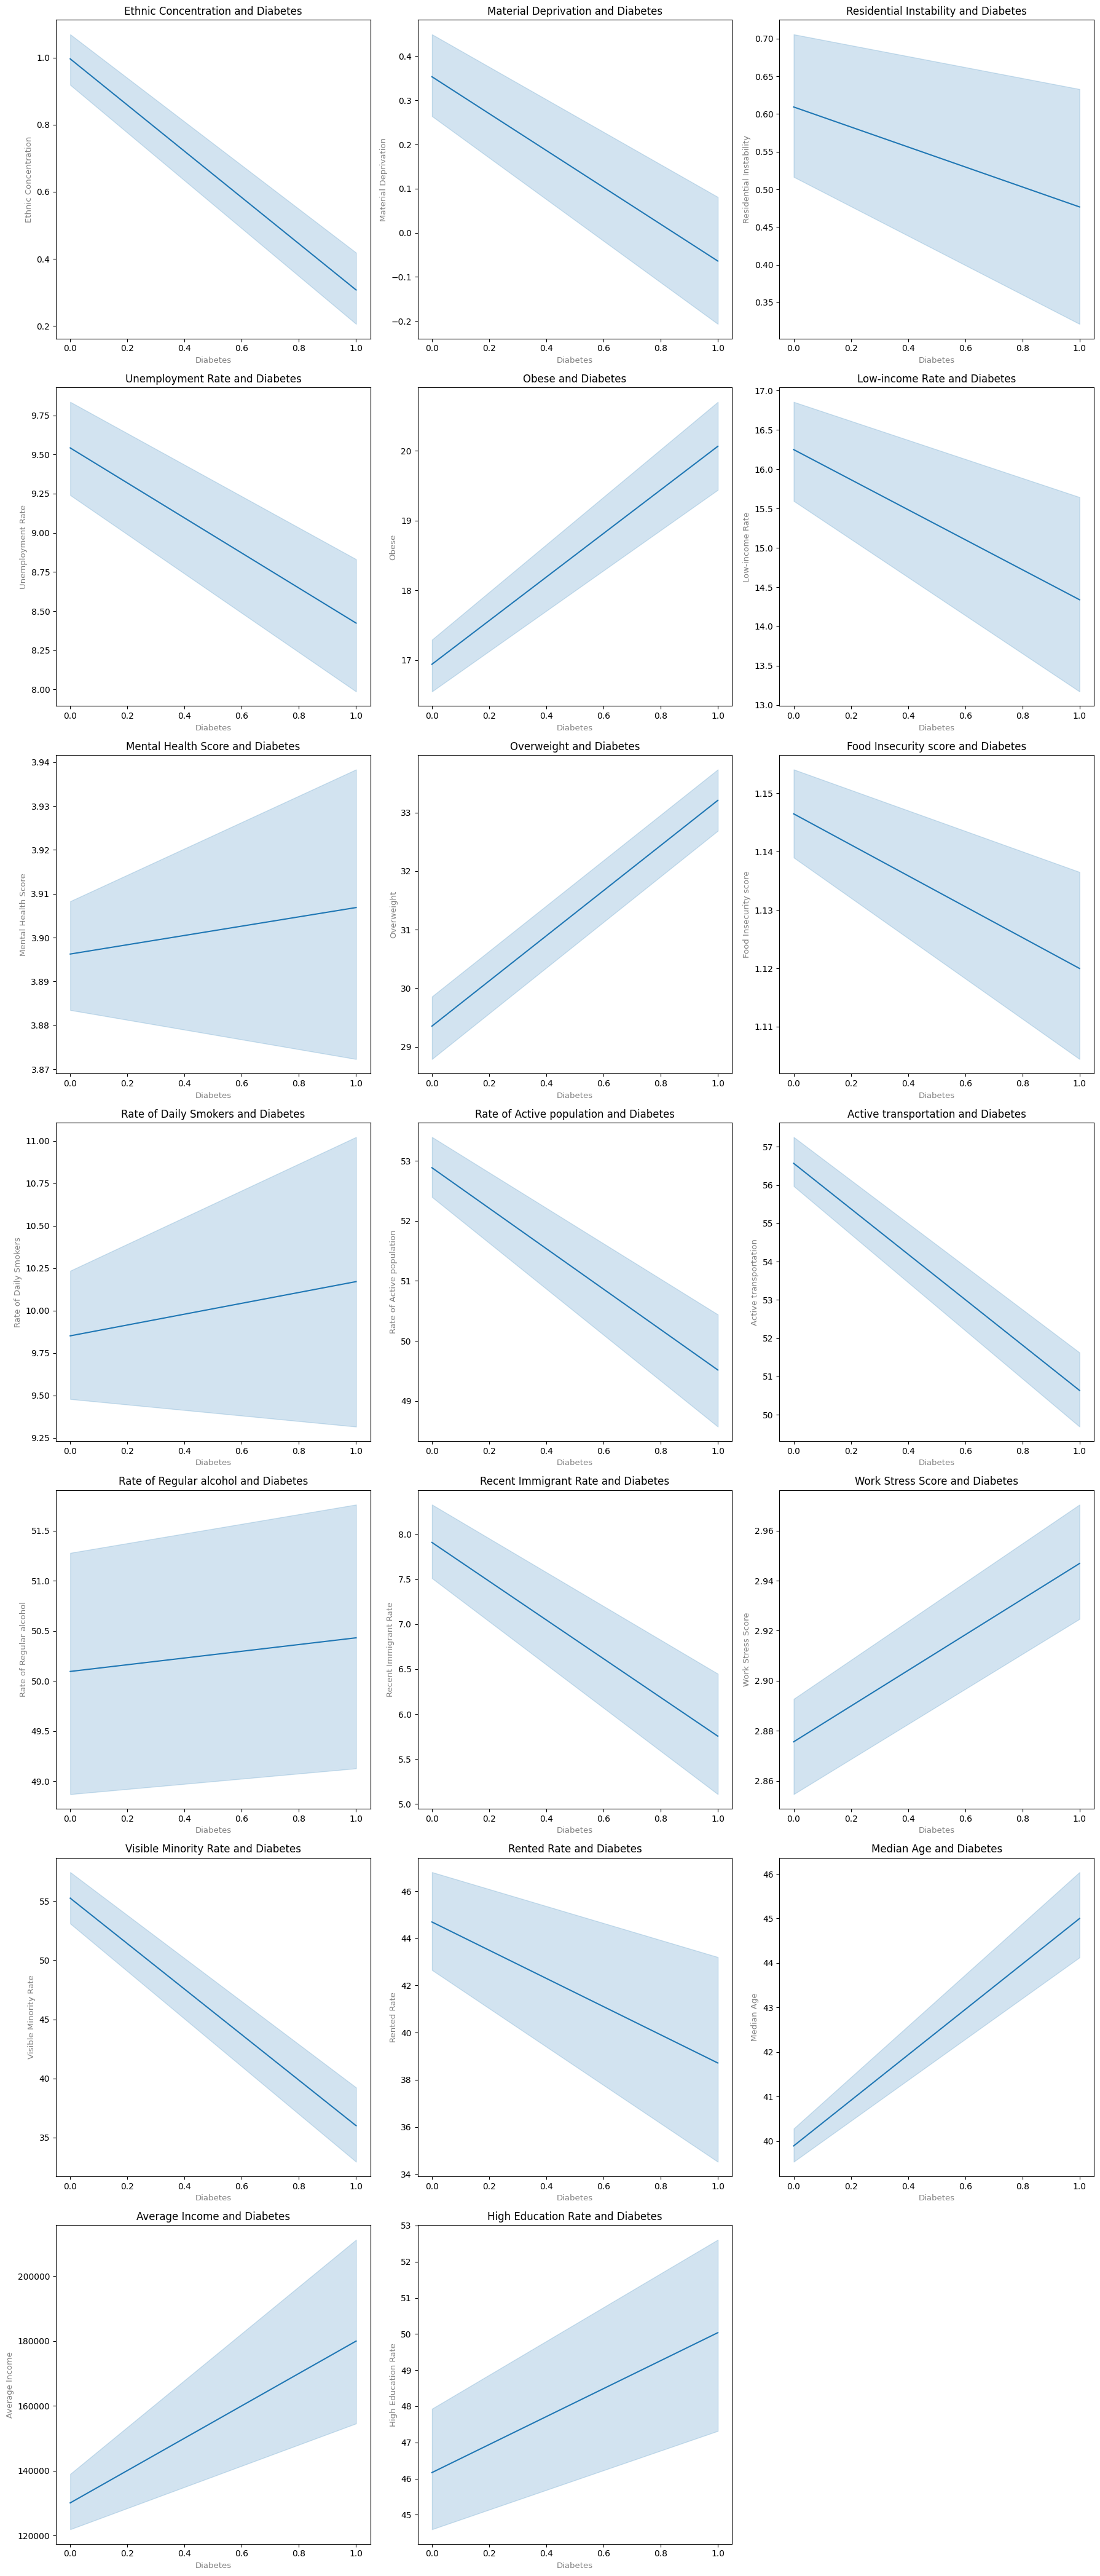

In [ ]:
Class = 'Diabetes'

# Determining the number of subplots in each row
subplots_per_row = 3
total_rows = len(Numeric_variables) // subplots_per_row + 1

# Creating line plots
fig, axes = plt.subplots(total_rows, subplots_per_row, figsize=(18, 6 * total_rows))

for i, variable_name in enumerate(Numeric_variables):
    row = i // subplots_per_row
    col = i % subplots_per_row
    sns.lineplot(data=data, x=Class, y=variable_name, palette='coolwarm', ax=axes[row, col])
    axes[row, col].set_title(f"{variable_name} and {Class}")

# Adding and adjusting labels for both axes
for row in axes:
    for ax in row:
        ax.set_xlabel(ax.get_xlabel(), color='grey', fontsize=9.5)
        ax.set_ylabel(ax.get_ylabel(), color='grey', fontsize=9.5)

# Removing empty subplots
for i in range(len(Numeric_variables), total_rows * subplots_per_row):
    fig.delaxes(axes[i // subplots_per_row, i % subplots_per_row])

plt.tight_layout()
plt.show()

**2.2.1 Examining correlation patterns**

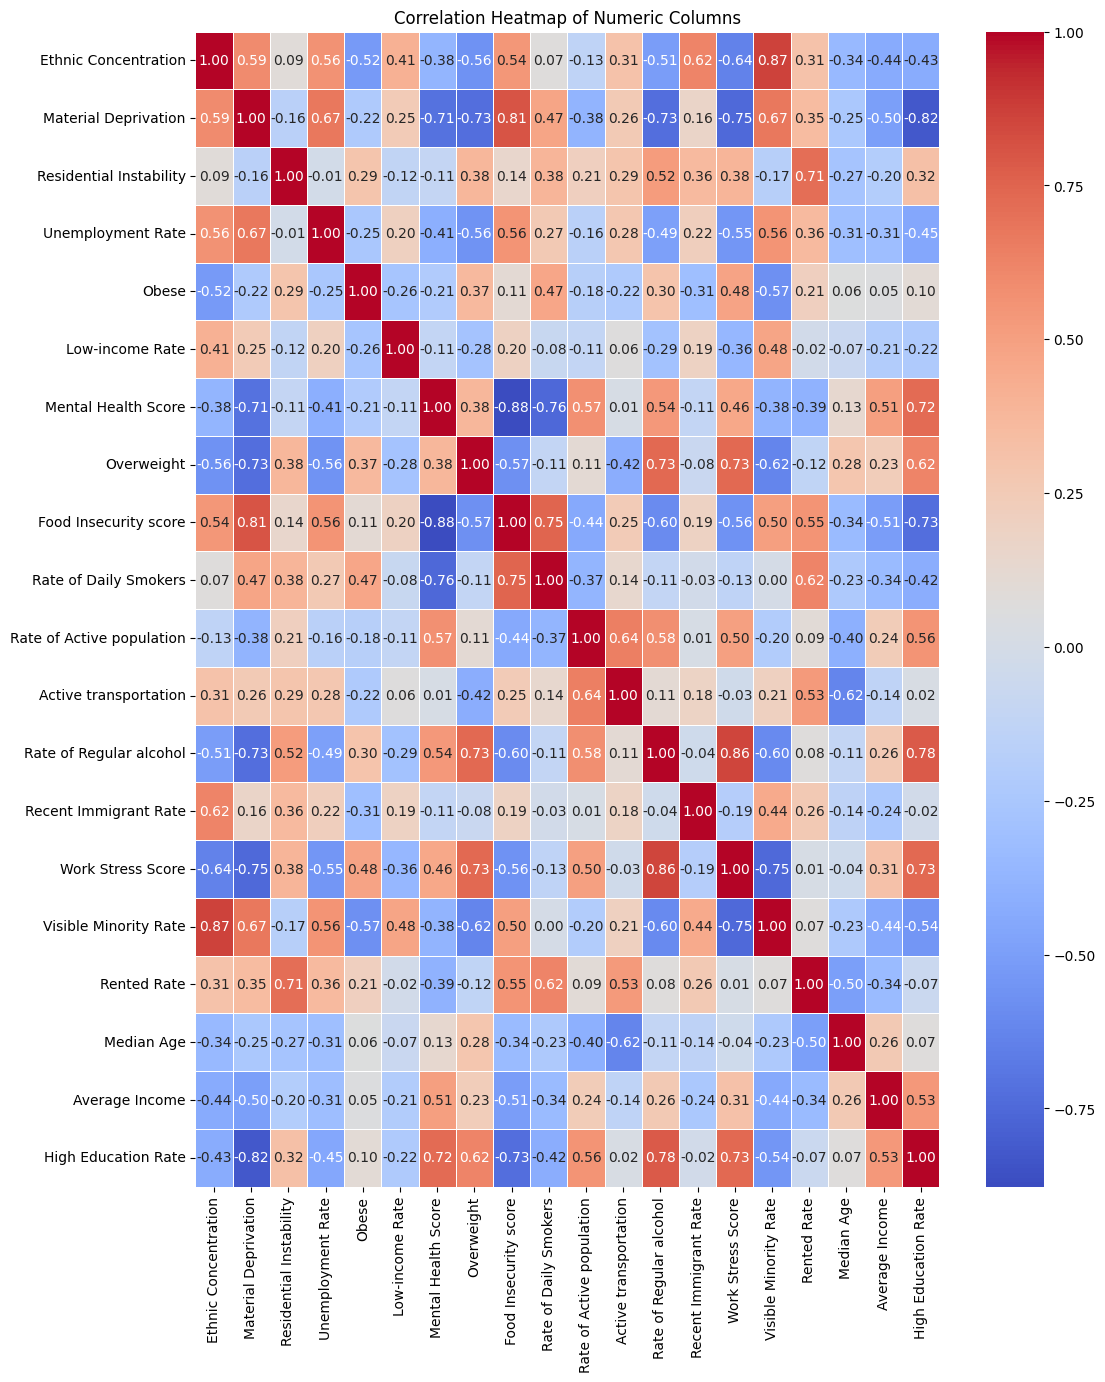

In [ ]:
# Creating a DataFrame with only the selected columns
numeric_data = data[Numeric_variables]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Creating a heatmap
plt.figure(figsize=(12, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [ ]:
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(pair)

print("Pairs of variables with correlation > 0.7:")
for pair in high_correlation_pairs:
    print(pair)

Pairs of variables with correlation > 0.7:
('Ethnic Concentration', 'Visible Minority Rate')
('Material Deprivation', 'Mental Health Score')
('Material Deprivation', 'Overweight')
('Material Deprivation', 'Food Insecurity score')
('Material Deprivation', 'Rate of Regular alcohol')
('Material Deprivation', 'Work Stress Score')
('Material Deprivation', 'High Education Rate')
('Residential Instability', 'Rented Rate')
('Mental Health Score', 'Food Insecurity score')
('Mental Health Score', 'Rate of Daily Smokers')
('Mental Health Score', 'High Education Rate')
('Overweight', 'Rate of Regular alcohol')
('Overweight', 'Work Stress Score')
('Food Insecurity score', 'Rate of Daily Smokers')
('Food Insecurity score', 'High Education Rate')
('Rate of Regular alcohol', 'Work Stress Score')
('Rate of Regular alcohol', 'High Education Rate')
('Work Stress Score', 'Visible Minority Rate')
('Work Stress Score', 'High Education Rate')


In [ ]:
numeric_variables_to_drop = ['Ethnic Concentration', 'Material Deprivation', 'Residential Instability', 'Food Insecurity score', 'Rate of Regular alcohol', 'Mental Health Score', 'Work Stress Score']

In [ ]:
data = data.drop(columns=numeric_variables_to_drop)

In [ ]:
Numeric_variables =[var for var in Numeric_variables if var not in numeric_variables_to_drop]

In [ ]:
Numeric_variables

['Unemployment Rate',
 'Obese',
 'Low-income Rate',
 'Overweight',
 'Rate of Daily Smokers',
 'Rate of Active population',
 'Active transportation',
 'Recent Immigrant Rate',
 'Visible Minority Rate',
 'Rented Rate',
 'Median Age',
 'Average Income',
 'High Education Rate']

**2.2.3 Examining normal distibution and outliers**

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

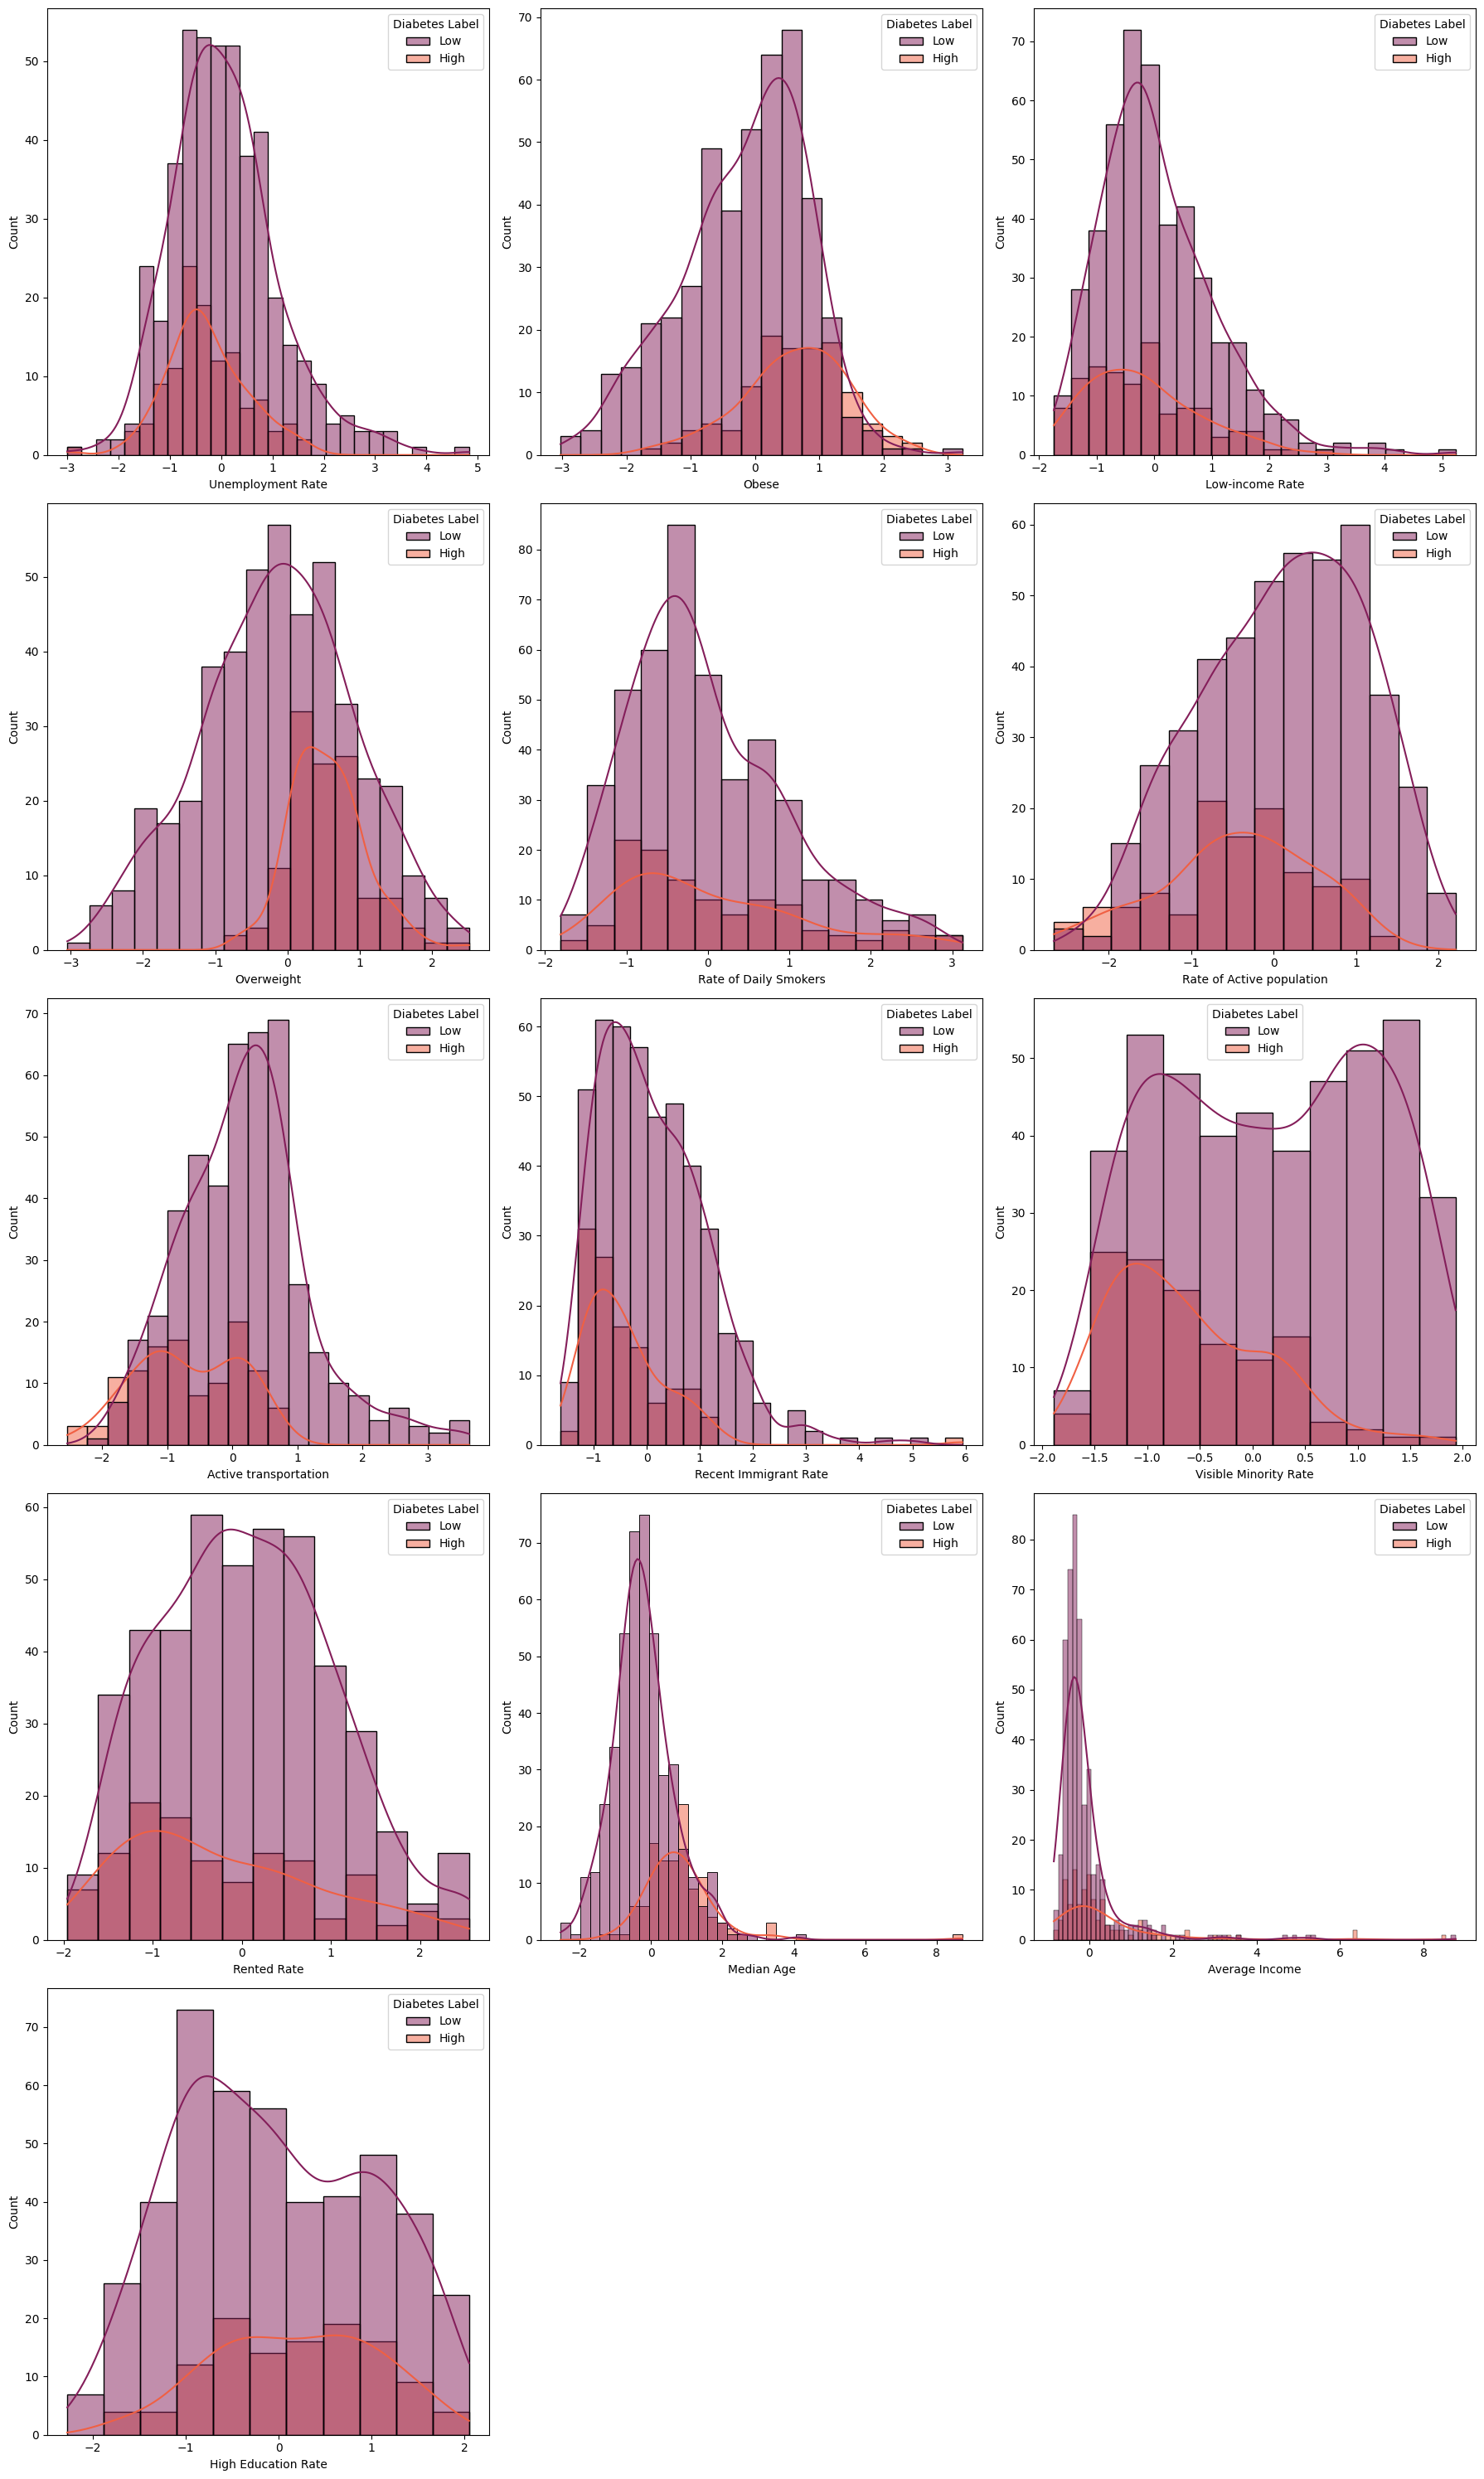

In [ ]:
# Determining the number of subplots in each row
subplots_per_row = 3
total_rows = len(Numeric_variables) // subplots_per_row + 1

# Creating a grid of subplots
fig, axs = plt.subplots(total_rows, subplots_per_row, figsize=(18, 6 * total_rows))

# Creating a copy of the original data
data_copy = data.copy()

# Looping through each feature in numeric variables
for i, column in enumerate(Numeric_variables):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // subplots_per_row
    y = i % subplots_per_row

    # Scaling the feature in the copied data using StandardScaler
    data_copy[column] = scaler.fit_transform(data_copy[[column]])

    # Plot a histogram of the scaled feature split by the diabetes class
    sns.histplot(data=data_copy, x=column, hue='Diabetes Label', kde=True, palette='rocket', ax=axs[x][y])

# Removing any empty subplots
for i in range(len(Numeric_variables), total_rows * subplots_per_row):
    fig.delaxes(axs[i // subplots_per_row, i % subplots_per_row])

# Display all the subplots
plt.tight_layout()
plt.show()

In [ ]:
#Removing visualization variable
data.drop(columns=['Diabetes Label'], inplace=True)

In [ ]:
# Defining a Z-score threshold
zscore_threshold = 4

# Initialize a dictionary to store variable names and their respective outlier counts
variables_with_outliers = {}

# Iterate through each continuous variable and identify variables with outliers
for variable_name in Numeric_variables:
    data_column = data[variable_name]
    z_scores = (data_column - data_column.mean()) / data_column.std()
    outliers_count = sum(abs(z_scores) > zscore_threshold)

    # Store the variable name and outlier count in the dictionary
    variables_with_outliers[variable_name] = outliers_count

# Printing the names of variables with their respective outlier counts
print("Variables with the number of outliers beyond 4 standard deviations:")
for variable_name, outliers_count in variables_with_outliers.items():
    print(f"{variable_name}: {outliers_count} observations")


Variables with the number of outliers beyond 4 standard deviations:
Unemployment Rate: 1 observations
Obese: 0 observations
Low-income Rate: 2 observations
Overweight: 0 observations
Rate of Daily Smokers: 0 observations
Rate of Active population: 0 observations
Active transportation: 0 observations
Recent Immigrant Rate: 3 observations
Visible Minority Rate: 0 observations
Rented Rate: 0 observations
Median Age: 2 observations
Average Income: 8 observations
High Education Rate: 0 observations


**Section 3: Data preperation fot simple models**

In [ ]:
DataSimple = data.copy()

In [ ]:
DataSimple.columns

Index(['Diabetes', 'Mental Health Binary', 'High Education Rate',
       'Rate of Daily Smokers', 'Food Insecurity binary', 'Unemployment Rate',
       'Median Age', 'Recent Immigrant Rate', 'Work Stress binary',
       'Rate of Active population', 'Visible Minority Rate',
       'Visible Minority Binary', 'Low-income Rate', 'Low-income Binary',
       'Ethnic Concentration quintiles', 'Residential Instability quintiles',
       'Average Income', 'Rented Rate', 'Active transportation', 'Overweight',
       'Obese', 'Material Deprivation quintiles', 'Instability_Deprivation'],
      dtype='object')

In [ ]:
# List of columns for log transformation
log_columns = ['Unemployment Rate',
 'Low-income Rate',
 'Rate of Daily Smokers',
 'Rate of Active population',
 'Recent Immigrant Rate',
 'Visible Minority Rate',
 'Median Age',
 'Average Income',
 'High Education Rate']

# Apply log transformation without mean imputation
for column in log_columns:
    # Apply log transformation directly
    DataSimple[f'log_{column.lower().replace(" ", "_")}'] = np.log(DataSimple[column])

In [ ]:
DataSimple.columns

Index(['Diabetes', 'Mental Health Binary', 'High Education Rate',
       'Rate of Daily Smokers', 'Food Insecurity binary', 'Unemployment Rate',
       'Median Age', 'Recent Immigrant Rate', 'Work Stress binary',
       'Rate of Active population', 'Visible Minority Rate',
       'Visible Minority Binary', 'Low-income Rate', 'Low-income Binary',
       'Ethnic Concentration quintiles', 'Residential Instability quintiles',
       'Average Income', 'Rented Rate', 'Active transportation', 'Overweight',
       'Obese', 'Material Deprivation quintiles', 'Instability_Deprivation'],
      dtype='object')

In [ ]:
DataSimple_to_drop = ['Unemployment Rate',
 'Low-income Rate',
 'Rate of Daily Smokers',
 'Rate of Active population',
 'Recent Immigrant Rate',
 'Visible Minority Rate',
 'Median Age',
 'Average Income',
 'High Education Rate']

DataSimple = DataSimple.drop(columns=DataSimple_to_drop, axis=1)

In [ ]:
# Specify binary columns as integers
binary_columns = ['Visible Minority Binary', 'Work Stress binary', 'Food Insecurity binary', 'Instability_Deprivation', 'Low-income Binary', 'Mental Health Binary']
DataSimple[binary_columns] = DataSimple[binary_columns].astype(int)

Label_column = ['Diabetes']
DataSimple[Label_column] = DataSimple[Label_column].astype(int)

# Specify categorical columns
categorical_columns = ['Residential Instability quintiles', 'Material Deprivation quintiles', 'Ethnic Concentration quintiles']
DataSimple[categorical_columns] = DataSimple[categorical_columns].astype('category')

# Specify the rest as floats
float_columns = [col for col in DataSimple.columns if col not in binary_columns + categorical_columns + Label_column]
DataSimple[float_columns] = DataSimple[float_columns].astype(float)


In [ ]:
X_S = DataSimple.drop('Diabetes', axis=1)
y_S = DataSimple['Diabetes']

# Split the data into training and test sets
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=0.2, random_state=42)

In [ ]:
# Application of SMOTE for upsampling on the training data
rus = RandomUnderSampler()
X_resampled_S, y_resampled_S = rus.fit_resample(X_train_S, y_train_S)


ct = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), categorical_columns),
    ],
    remainder='passthrough'
)

# Applying the one-hot encoding transformation to X_resampled and X_test
X_resampled_S = ct.fit_transform(X_resampled_S, y_resampled_S)
X_test_S = ct.transform(X_test_S)

In [ ]:
#converting numpyarray back to DataFrame
X_resampled_S = pd.DataFrame(X_resampled_S, columns=ct.get_feature_names_out())
X_test_S = pd.DataFrame(X_test_S, columns=ct.get_feature_names_out())

In [ ]:
(X_resampled_S.shape)

(206, 25)

In [ ]:
{X_test_S.shape}

{(114, 25)}

In [ ]:
{y_test_S.shape}

{(114,)}

In [ ]:
(y_resampled_S.shape)

(206,)

**Section 4: Creating Simple models**

**4.1 LR model**

In [ ]:
X_resampled_scaled = scaler.fit_transform(X_resampled_S)
X_test_scaled = scaler.transform(X_test_S)

As we have 35 shortlisted variables, testing all combinations might be infeasible. Thus, the recursive feature elimination with cross validation (RFECV) will be applied to find the optimal subset of variables that maximizes the performance of the model while also avoiding overfitting. Removing less important variables will make the model more interpretable, and more generalizable to unseen data. The tool initiates optimization with all variables included; thereafter, it eliminates one variables at a time. The tool relies on the average performance score of the model on the test data through each iteration.

In [ ]:
#setting custom scorer
accuracy_scoring = make_scorer(accuracy_score)

In [ ]:
Log_reg_model = LogisticRegression()

cv_LR = StratifiedKFold(5)
rfecv_LR = RFECV(
    estimator=Log_reg_model,
    step=1,
    cv=cv_LR,
    scoring=accuracy_scoring,
    min_features_to_select=1,
)
rfecv_LR.fit(X_resampled_scaled, y_resampled_S)

# Print the optimal number of selected features
print(f"Optimal number of features -LR: {rfecv_LR.n_features_}")

Optimal number of features -LR: 4


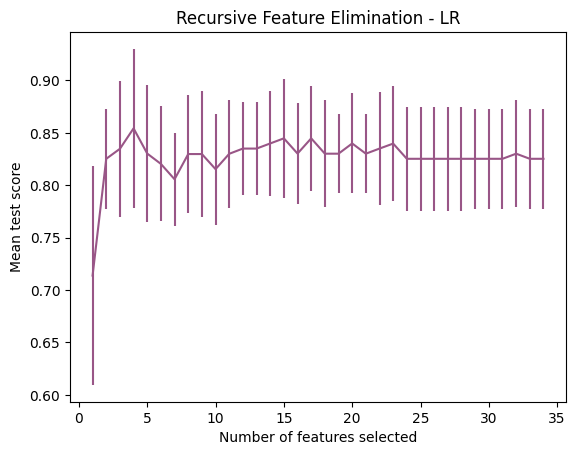

In [ ]:
# Calculate the number of different feature selections tested
n_scores_LR = len(rfecv_LR.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_LR + 1),
    rfecv_LR.cv_results_["mean_test_score"],
    yerr=rfecv_LR.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - LR")

# Show the plot
plt.show()

In [ ]:
selected_LR_features = X_resampled_S.columns[rfecv_LR.support_]
eliminated_LR_features = X_resampled_S.columns[~rfecv_LR.support_]

print("Selected Features for LR:")
print(selected_LR_features)
print("\nEliminated Features for LR:")
print(eliminated_LR_features)

Selected Features for LR:
Index(['remainder__Active transportation', 'remainder__Overweight',
       'remainder__Obese', 'remainder__log_median_age'],
      dtype='object')

Eliminated Features for LR:
Index(['one_hot_encoder__Residential Instability quintiles_1',
       'one_hot_encoder__Residential Instability quintiles_2',
       'one_hot_encoder__Residential Instability quintiles_3',
       'one_hot_encoder__Residential Instability quintiles_4',
       'one_hot_encoder__Residential Instability quintiles_5',
       'one_hot_encoder__Material Deprivation quintiles_1',
       'one_hot_encoder__Material Deprivation quintiles_2',
       'one_hot_encoder__Material Deprivation quintiles_3',
       'one_hot_encoder__Material Deprivation quintiles_4',
       'one_hot_encoder__Material Deprivation quintiles_5',
       'one_hot_encoder__Ethnic Concentration quintiles_1',
       'one_hot_encoder__Ethnic Concentration quintiles_2',
       'one_hot_encoder__Ethnic Concentration quintiles_3',
   

In [ ]:
# Accessing the mean test scores
mean_test_scores_LR = rfecv_LR.cv_results_["mean_test_score"]

# Printing the list of mean test scores along with the number of selected features
for i, score_LR in enumerate(mean_test_scores_LR):
    num_selected_features = i + 1  #start with one feature
    print(f"Number of Selected Features: {num_selected_features}, Mean Test Score: {score_LR}")

Number of Selected Features: 1, Mean Test Score: 0.7138211382113822
Number of Selected Features: 2, Mean Test Score: 0.8252032520325203
Number of Selected Features: 3, Mean Test Score: 0.8347270615563298
Number of Selected Features: 4, Mean Test Score: 0.854239256678281
Number of Selected Features: 5, Mean Test Score: 0.8301974448315912
Number of Selected Features: 6, Mean Test Score: 0.8203252032520325
Number of Selected Features: 7, Mean Test Score: 0.8056910569105691
Number of Selected Features: 8, Mean Test Score: 0.8297328687572589
Number of Selected Features: 9, Mean Test Score: 0.8297328687572589
Number of Selected Features: 10, Mean Test Score: 0.8153310104529616
Number of Selected Features: 11, Mean Test Score: 0.8299651567944251
Number of Selected Features: 12, Mean Test Score: 0.8349593495934959
Number of Selected Features: 13, Mean Test Score: 0.8349593495934959
Number of Selected Features: 14, Mean Test Score: 0.8398373983739837
Number of Selected Features: 15, Mean Test S



3.3 Developing a logistic regression prediction model


In [ ]:
LR_features = ['remainder__Active transportation', 'remainder__Overweight',
       'remainder__Obese', 'remainder__log_median_age']

In [ ]:
#Fitting the data
X_train_scaled_LR = scaler.fit_transform(X_resampled_S[LR_features])
X_test_scaled_LR = scaler.transform(X_test_S[LR_features])

In [ ]:
LR_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
LR_model.fit(X_train_scaled_LR, y_resampled_S)

LogisticRegression(solver='liblinear')

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_LR_model = cross_val_predict(LR_model, X_train_scaled_LR, y_resampled_S, cv=5)

# Calculating the full confusion matrix
conf_matrix_LR = confusion_matrix(y_resampled_S, predicted_labels_LR_model)

# Calculate the full classification report
class_report_LR = classification_report(y_resampled_S, predicted_labels_LR_model)

# Calculate accuracy
accuracy_LR = accuracy_score(y_resampled_S, predicted_labels_LR_model)

# Calculate precision
precision_LR = precision_score(y_resampled_S, predicted_labels_LR_model)

# Calculate recall
recall_LR = recall_score(y_resampled_S, predicted_labels_LR_model)

# Calculate F1 score
f1_LR = f1_score(y_resampled_S, predicted_labels_LR_model)


# Print the full confusion matrix and classification report
print("Logistic Regression Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_LR)
print("B. Classification Report:")
print(class_report_LR)
print("C. Accuracy: {:.2f}".format(accuracy_LR))
print("D. Precision: {:.2f}".format(precision_LR))
print("E. Recall (Sensitivity): {:.2f}".format(recall_LR))
print("F. F1 Score: {:.2f}".format(f1_LR))

Logistic Regression Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[85 18]
 [ 8 95]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       103
           1       0.84      0.92      0.88       103

    accuracy                           0.87       206
   macro avg       0.88      0.87      0.87       206
weighted avg       0.88      0.87      0.87       206

C. Accuracy: 0.87
D. Precision: 0.84
E. Recall (Sensitivity): 0.92
F. F1 Score: 0.88


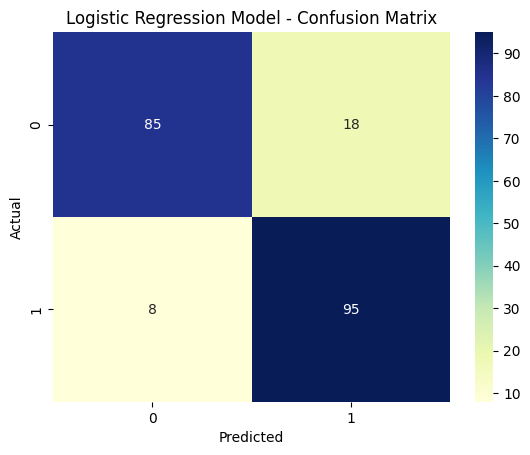

In [ ]:
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Logistic Regression Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Test ROC-AUC: 0.9269


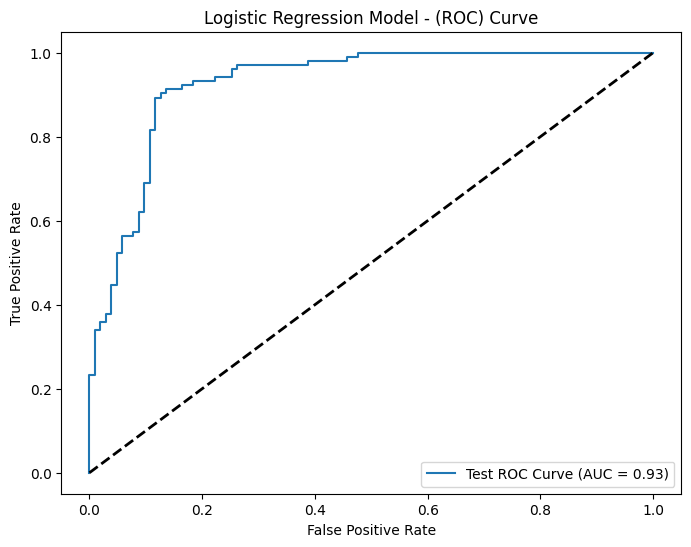

In [ ]:
predicted_probs_LR = LR_model.predict_proba(X_train_scaled_LR)[:, 1]

# Calculate ROC-AUC on the train set
roc_auc_train_LR = roc_auc_score(y_resampled_S, predicted_probs_LR)
print(f"Test ROC-AUC: {roc_auc_train_LR:.4f}")

# Calculate ROC curve on the train set
fpr_LR, tpr_LR, _ = roc_curve(y_resampled_S, predicted_probs_LR)

# Plot ROC curve for the train set
plt.figure(figsize=(8, 6))
plt.plot(fpr_LR, tpr_LR, label=f'Test ROC Curve (AUC = {roc_auc_train_LR:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Making predictions on the test set of Logit Regression
y_pred_test_LR = LR_model.predict(X_test_scaled_LR)

# Calculating metrics
accuracy_test_LR = accuracy_score(y_test_S, y_pred_test_LR)
precision_test_LR = precision_score(y_test_S, y_pred_test_LR)
recall_test_LR = recall_score(y_test_S, y_pred_test_LR)
f1_test_LR = f1_score(y_test_S, y_pred_test_LR)
conf_matrix_test_LR = confusion_matrix(y_test_S, y_pred_test_LR)

# Printing the evaluation metrics
print("Logistic Regression Model - Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_LR))
print("Precision: {:.2f}".format(precision_test_LR))
print("Recall (Sensitivity): {:.2f}".format(recall_test_LR))
print("F1 Score: {:.2f}".format(f1_test_LR))
print("Confusion Matrix:")
print(conf_matrix_test_LR)

Logistic Regression Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.82
Precision: 0.43
Recall (Sensitivity): 1.00
F1 Score: 0.60
Confusion Matrix:
[[79 20]
 [ 0 15]]


Test ROC-AUC: 0.9421


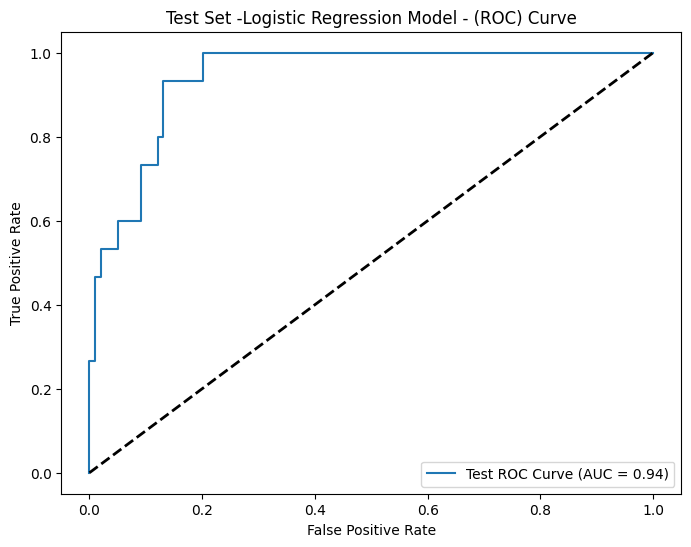

In [ ]:
# Making predictions on the test set of Logistic Regression
predicted_probs_test_LR = LR_model.predict_proba(X_test_scaled_LR)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_LR = roc_auc_score(y_test_S, predicted_probs_test_LR)
print(f"Test ROC-AUC: {roc_auc_test_LR:.4f}")

# Calculate ROC curve on the test set
fpr_test_LR, tpr_test_LR, _ = roc_curve(y_test_S, predicted_probs_test_LR)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_LR, tpr_test_LR, label=f'Test ROC Curve (AUC = {roc_auc_test_LR:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set -Logistic Regression Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**4.2 KNN model**

In [ ]:
#Creating a list to store the cross-validation scores for different values of k
k_grid = list(range(1, 21))  # Try k values from 1 to 20, for example
cv_scores = []

In [ ]:
for k in k_grid:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    scores = cross_val_score(knn, X_train_scaled_LR, y_resampled_S, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

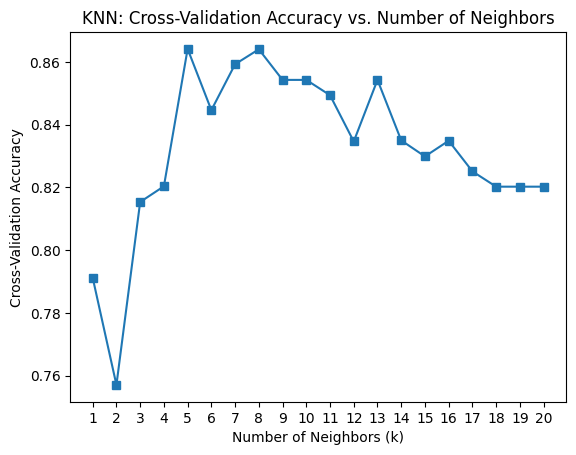

In [ ]:
#Plotting the cross-validation scores to identify the optimal K
plt.plot(k_grid, cv_scores, marker = "s")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN: Cross-Validation Accuracy vs. Number of Neighbors')
plt.xticks(np.arange(min(k_grid), max(k_grid) + 1, 1))
plt.show()


In [ ]:
# Print K and the corresponding cross-validation scores
for k, score in zip(k_grid, cv_scores):
    print(f"K = {k}, Cross-Validation Accuracy = {score:.2f}")

K = 1, Cross-Validation Accuracy = 0.79
K = 2, Cross-Validation Accuracy = 0.76
K = 3, Cross-Validation Accuracy = 0.82
K = 4, Cross-Validation Accuracy = 0.82
K = 5, Cross-Validation Accuracy = 0.86
K = 6, Cross-Validation Accuracy = 0.84
K = 7, Cross-Validation Accuracy = 0.86
K = 8, Cross-Validation Accuracy = 0.86
K = 9, Cross-Validation Accuracy = 0.85
K = 10, Cross-Validation Accuracy = 0.85
K = 11, Cross-Validation Accuracy = 0.85
K = 12, Cross-Validation Accuracy = 0.83
K = 13, Cross-Validation Accuracy = 0.85
K = 14, Cross-Validation Accuracy = 0.83
K = 15, Cross-Validation Accuracy = 0.83
K = 16, Cross-Validation Accuracy = 0.83
K = 17, Cross-Validation Accuracy = 0.83
K = 18, Cross-Validation Accuracy = 0.82
K = 19, Cross-Validation Accuracy = 0.82
K = 20, Cross-Validation Accuracy = 0.82


In [ ]:
#creating KNN classifier with K=5
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
#fitting the KNN model on the resampled training data
knn.fit(X_train_scaled_LR, y_resampled_S)

KNeighborsClassifier(metric='manhattan')

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_knn_model = cross_val_predict(knn, X_train_scaled_LR, y_resampled_S, cv=5)

# Calculating the full confusion matrix
conf_matrix_knn = confusion_matrix(y_resampled_S, predicted_labels_knn_model)

# Calculate the full classification report
class_report_knn = classification_report(y_resampled_S, predicted_labels_knn_model)

# Calculate accuracy
accuracy_knn = accuracy_score(y_resampled_S, predicted_labels_knn_model)

# Calculate precision
precision_knn = precision_score(y_resampled_S, predicted_labels_knn_model)

# Calculate recall
recall_knn = recall_score(y_resampled_S, predicted_labels_knn_model)

# Calculate F1 score
f1_knn = f1_score(y_resampled_S, predicted_labels_knn_model)


# Print the full confusion matrix and classification report
print("KNN Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_knn)
print("B. Classification Report:")
print(class_report_knn)
print("C. Accuracy: {:.2f}".format(accuracy_knn))
print("D. Precision: {:.2f}".format(precision_knn))
print("E. Recall (Sensitivity): {:.2f}".format(recall_knn))
print("F. F1 Score: {:.2f}".format(f1_knn))

KNN Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[81 22]
 [ 9 94]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       103
           1       0.81      0.91      0.86       103

    accuracy                           0.85       206
   macro avg       0.86      0.85      0.85       206
weighted avg       0.86      0.85      0.85       206

C. Accuracy: 0.85
D. Precision: 0.81
E. Recall (Sensitivity): 0.91
F. F1 Score: 0.86


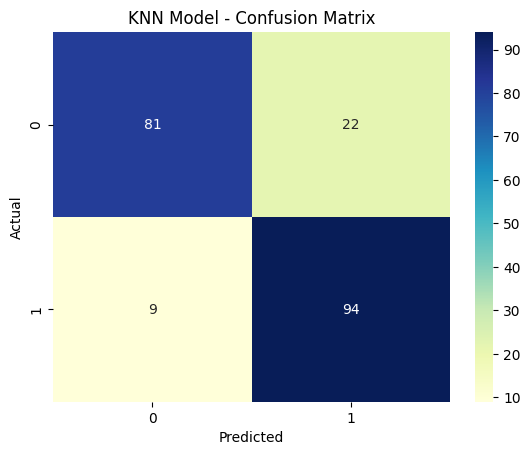

In [ ]:
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='YlGnBu')
plt.title('KNN Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Test ROC-AUC: 0.9717


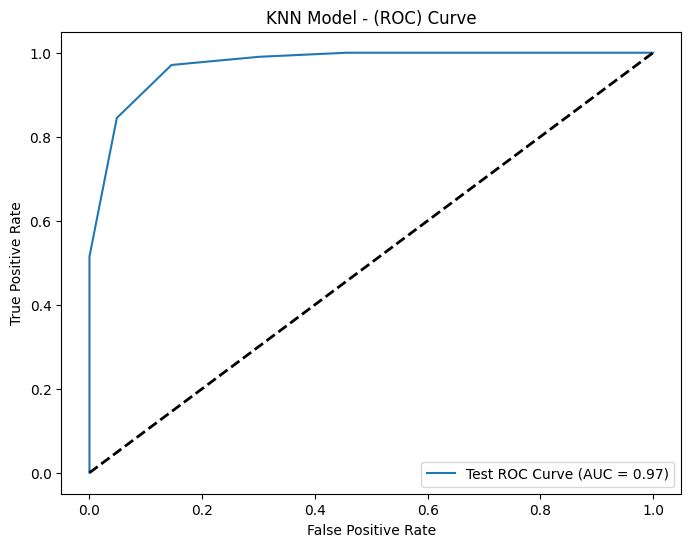

In [ ]:
predicted_probs_knn = knn.predict_proba(X_train_scaled_LR)[:, 1]  # probability of 1 (outcome)

# Calculate ROC-AUC on the train set
roc_auc_knn = roc_auc_score(y_resampled_S, predicted_probs_knn)
print(f"Test ROC-AUC: {roc_auc_knn:.4f}")

# Calculate ROC curve on the train set
fpr_knn, tpr_knn, _ = roc_curve(y_resampled_S, predicted_probs_knn)

# Plot ROC curve for the train set
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'Test ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Making predictions on the test set of Logit Regression
y_pred_test_knn = knn.predict(X_test_scaled_LR)

# Calculating metrics
accuracy_test_knn = accuracy_score(y_test_S, y_pred_test_knn)
precision_test_knn = precision_score(y_test_S, y_pred_test_knn)
recall_test_knn = recall_score(y_test_S, y_pred_test_knn)
f1_test_knn = f1_score(y_test_S, y_pred_test_knn)
conf_matrix_test_knn = confusion_matrix(y_test_S, y_pred_test_knn)

# Printing the evaluation metrics
print("Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_knn))
print("Precision: {:.2f}".format(precision_test_knn))
print("Recall (Sensitivity): {:.2f}".format(recall_test_knn))
print("F1 Score: {:.2f}".format(f1_test_knn))
print("Confusion Matrix:")
print(conf_matrix_test_knn)

Test Set- Confusion Matrix/Classification Report
Accuracy: 0.86
Precision: 0.48
Recall (Sensitivity): 0.93
F1 Score: 0.64
Confusion Matrix:
[[84 15]
 [ 1 14]]


Test ROC-AUC: 0.9401


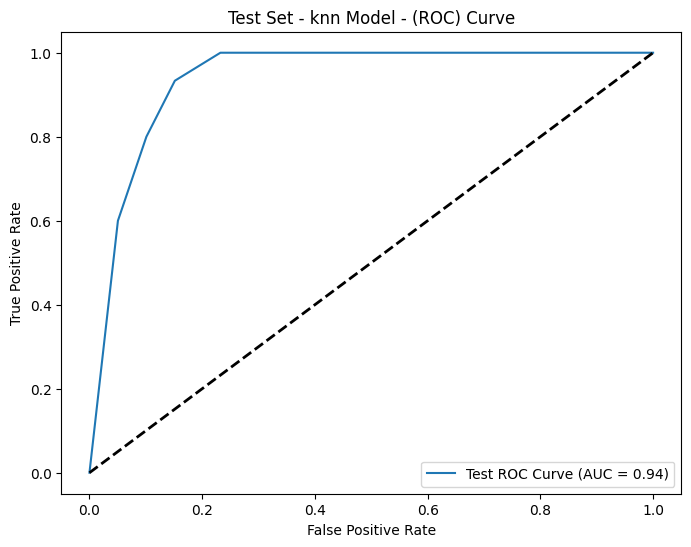

In [ ]:
# Making predictions on the test set of Logistic Regression
predicted_probs_test_knn = knn.predict_proba(X_test_scaled_LR)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_knn = roc_auc_score(y_test_S, predicted_probs_test_knn)
print(f"Test ROC-AUC: {roc_auc_test_knn:.4f}")

# Calculate ROC curve on the test set
fpr_test_knn, tpr_test_knn, _ = roc_curve(y_test_S, predicted_probs_test_knn)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_knn, tpr_test_knn, label=f'Test ROC Curve (AUC = {roc_auc_test_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set - knn Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**4.3 SVM Model**

In [ ]:
SVM_features= ['remainder__Active transportation', 'remainder__Overweight',
       'remainder__Obese', 'remainder__log_median_age']

In [ ]:
#Fitting the data of SVM
X_train_scaled_SVM = scaler.fit_transform(X_resampled_S[SVM_features])
X_test_scaled_SVM = scaler.transform(X_test_S[SVM_features])

In [ ]:
# Initialize an SVM classifier
SVM = SVC(class_weight=None, probability=True)


# Creating a pipeline that applies the Decision Tree classifier
model_for_SVM = Pipeline([
    ('svm', SVM)
])

# Fitting the model on the training data
model_for_SVM.fit(X_train_scaled_SVM, y_resampled_S)

Pipeline(steps=[('svm', SVC(probability=True))])

**4.3.1 Hyperparametre tunning for SVM**

In [ ]:
# Define a dictionary of hyperparameter values to search over.
param_dist_SVM = {
    'svm__class_weight': [None],
    'svm__C': [0.01, 0.1, 1, 10],
    'svm__kernel': ["rbf"],
    'svm__gamma': [0.01, 1, 10]
}
# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_SVM = GridSearchCV(
    model_for_SVM, param_grid=param_dist_SVM, cv=skf)

# Train Grid Search on the training data
random_search_SVM.fit(X_train_scaled_SVM, y_resampled_S)

# Extract results into a DataFrame
results_SVM = pd.DataFrame(random_search_SVM.cv_results_)

# Display the set of parameters that achieved the best score
results_SVM[results_SVM['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__class_weight,param_svm__gamma,param_svm__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.015576,0.00511,0.006305,0.003315,10,None,0.01,rbf,"{'svm__C': 10, 'svm__class_weight': None, 'svm...",0.904762,0.780488,0.878049,0.829268,0.853659,0.849245,0.042563,1


In [ ]:
random_search_SVM.best_params_

{'svm__C': 10,
 'svm__class_weight': None,
 'svm__gamma': 0.01,
 'svm__kernel': 'rbf'}

In [ ]:
model_for_SVM = model_for_SVM.set_params(svm__C=10, svm__class_weight=None, svm__gamma=0.01, svm__kernel='rbf')

# Refit the model using the training data
model_for_SVM.fit(X_train_scaled_SVM, y_resampled_S)

Pipeline(steps=[('svm', SVC(C=10, gamma=0.01, probability=True))])

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_SVM_model = cross_val_predict(model_for_SVM, X_train_scaled_SVM, y_resampled_S, cv=5)

# Calculating the full confusion matrix
conf_matrix_SVM = confusion_matrix(y_resampled_S, predicted_labels_SVM_model)

# Calculate the full classification report
class_report_SVM = classification_report(y_resampled_S, predicted_labels_SVM_model)

# Calculate accuracy
accuracy_SVM = accuracy_score(y_resampled_S, predicted_labels_SVM_model)

# Calculate precision
precision_SVM = precision_score(y_resampled_S, predicted_labels_SVM_model)

# Calculate recall
recall_SVM = recall_score(y_resampled_S, predicted_labels_SVM_model)

# Calculate F1 score
f1_SVM = f1_score(y_resampled_S, predicted_labels_SVM_model)


# Print the full confusion matrix and classification report
print("DT Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_SVM)
print("B. Classification Report:")
print(class_report_SVM)
print("C. Accuracy: {:.2f}".format(accuracy_SVM))
print("D. Precision: {:.2f}".format(precision_SVM))
print("E. Recall (Sensitivity): {:.2f}".format(recall_SVM))
print("F. F1 Score: {:.2f}".format(f1_SVM))


DT Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[79 24]
 [ 7 96]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       103
           1       0.80      0.93      0.86       103

    accuracy                           0.85       206
   macro avg       0.86      0.85      0.85       206
weighted avg       0.86      0.85      0.85       206

C. Accuracy: 0.85
D. Precision: 0.80
E. Recall (Sensitivity): 0.93
F. F1 Score: 0.86


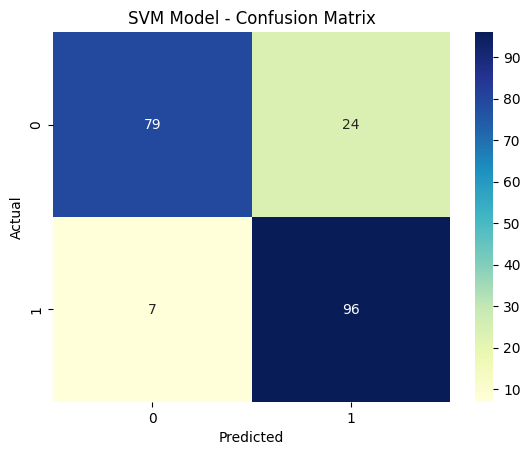

In [ ]:
sns.heatmap(conf_matrix_SVM, annot=True, fmt='d', cmap='YlGnBu')
plt.title('SVM Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Training ROC-AUC: 0.9313


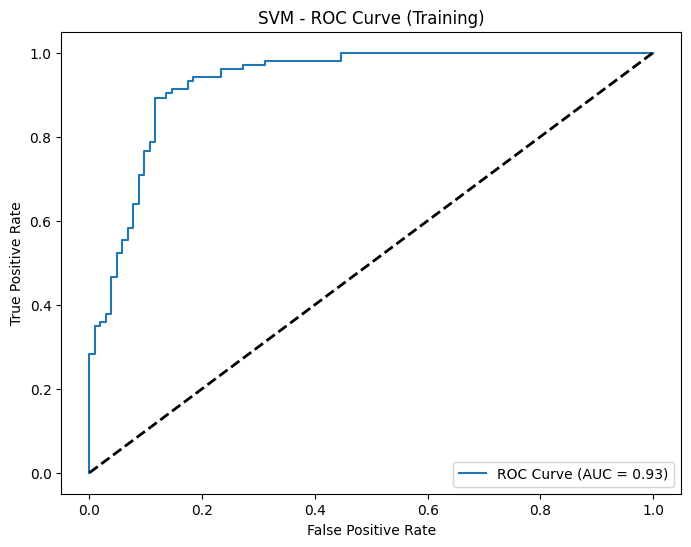

In [ ]:
predicted_probs_SVM = model_for_SVM.predict_proba(X_train_scaled_SVM)[:, 1]

# Calculate ROC-AUC on the training set
roc_auc_train_SVM = roc_auc_score(y_resampled_S, predicted_probs_SVM)
print(f"Training ROC-AUC: {roc_auc_train_SVM:.4f}")

# Calculate ROC curve on the training set
fpr_SVM, tpr_SVM, _ = roc_curve(y_resampled_S, predicted_probs_SVM)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_SVM, tpr_SVM, label=f'ROC Curve (AUC = {roc_auc_train_SVM:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - ROC Curve (Training)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Making predictions on the test set of the DT model
y_pred_test_SVM = model_for_SVM.predict(X_test_scaled_SVM)

# Calculating metrics
accuracy_test_SVM = accuracy_score(y_test_S, y_pred_test_SVM)
precision_test_SVM = precision_score(y_test_S, y_pred_test_SVM)
recall_test_SVM = recall_score(y_test_S, y_pred_test_SVM)
f1_test_SVM = f1_score(y_test_S, y_pred_test_SVM)
conf_matrix_test_SVM = confusion_matrix(y_test_S, y_pred_test_SVM)

# Printing the evaluation metrics
print("SVM Model - Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_SVM))
print("Precision: {:.2f}".format(precision_test_SVM))
print("Recall (Sensitivity): {:.2f}".format(recall_test_SVM))
print("F1 Score: {:.2f}".format(f1_test_SVM))
print("Confusion Matrix:")
print(conf_matrix_test_SVM)

SVM Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.81
Precision: 0.41
Recall (Sensitivity): 1.00
F1 Score: 0.58
Confusion Matrix:
[[77 22]
 [ 0 15]]


Test ROC-AUC: 0.9468


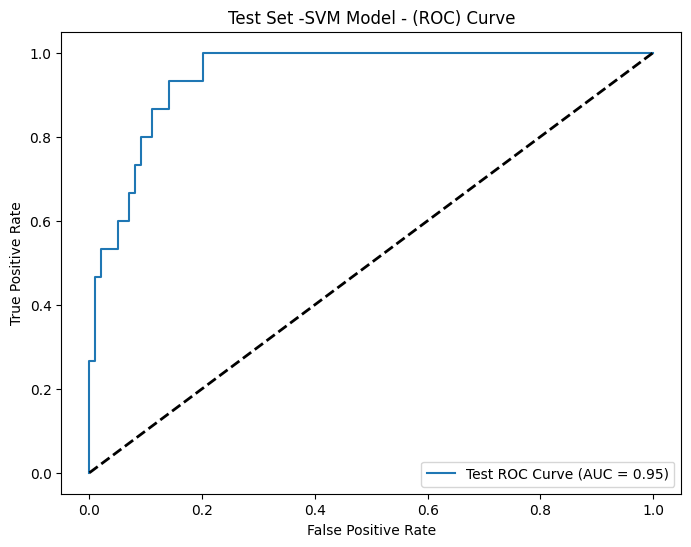

In [ ]:
# Making predictions on the test set of Logistic Regression
predicted_probs_test_SVM = model_for_SVM.predict_proba(X_test_scaled_SVM)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_SVM = roc_auc_score(y_test_S, predicted_probs_test_SVM)
print(f"Test ROC-AUC: {roc_auc_test_SVM:.4f}")

# Calculate ROC curve on the test set
fpr_test_SVM, tpr_test_SVM, _ = roc_curve(y_test_S, predicted_probs_test_SVM)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_SVM, tpr_test_SVM, label=f'Test ROC Curve (AUC = {roc_auc_test_SVM:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set -SVM Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Section 5: Data Preperation for Ensemble models**

In [ ]:
# Specify binary columns as integers
binary_columns = ['Visible Minority Binary', 'Work Stress binary', 'Food Insecurity binary', 'Instability_Deprivation', 'Low-income Binary', 'Mental Health Binary']
data[binary_columns] = data[binary_columns].astype(int)

Label_column = ['Diabetes']
data[Label_column] = data[Label_column].astype(int)

# Specify categorical columns
categorical_columns = ['Residential Instability quintiles', 'Material Deprivation quintiles', 'Ethnic Concentration quintiles']
data[categorical_columns] = data[categorical_columns].astype('category')

# Specify the rest as floats
float_columns = [col for col in data.columns if col not in binary_columns + categorical_columns + Label_column]
data[float_columns] = data[float_columns].astype(float)

In [ ]:
X = data.drop('Diabetes', axis=1)
y = data['Diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Application of SMOTE for upsampling on the training data
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


ct = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), categorical_columns),
    ],
    remainder='passthrough'
)

# Applying the one-hot encoding transformation to X_resampled and X_test
X_resampled = ct.fit_transform(X_resampled, y_resampled)
X_test = ct.transform(X_test)

In [ ]:
#converting numpyarray back to DataFrame
X_resampled= pd.DataFrame(X_resampled, columns=ct.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=ct.get_feature_names_out())

In [ ]:
X_resampled.shape

(206, 34)

In [ ]:
X_test.shape

(114, 34)

In [ ]:
y_resampled.shape

(206,)

In [ ]:
y_test.shape

(114,)

**Section 6. Creating ensemble models**

**6.1 Decision Tress**

In [ ]:
DT_model = DecisionTreeClassifier()

cv_DT = StratifiedKFold(5)
rfecv_DT = RFECV(
    estimator=DT_model,
    step=1,
    cv=cv_DT,
    scoring=accuracy_scoring,
    min_features_to_select=1,
)

rfecv_DT.fit(X_resampled, y_resampled)

# Print the optimal number of selected features
print(f"Optimal number of features -DT: {rfecv_DT.n_features_}")

Optimal number of features -DT: 7


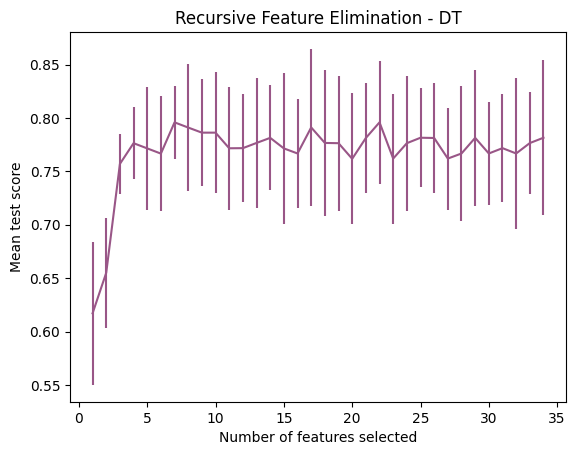

In [ ]:
# Calculate the number of different feature selections tested
n_scores_DT = len(rfecv_DT.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_DT + 1),
    rfecv_DT.cv_results_["mean_test_score"],
    yerr=rfecv_DT.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - DT")

# Show the plot
plt.show()


In [ ]:
selected_DT_features = X_resampled.columns[rfecv_DT.support_]

print("Selected Features for DT:")
print(selected_DT_features)

Selected Features for DT:
Index(['remainder__Rate of Daily Smokers', 'remainder__Median Age',
       'remainder__Recent Immigrant Rate',
       'remainder__Rate of Active population', 'remainder__Rented Rate',
       'remainder__Overweight', 'remainder__Obese'],
      dtype='object')


In [ ]:
# Accessing the mean test scores
mean_test_scores_DT = rfecv_DT.cv_results_["mean_test_score"]

# Printing the list of mean test scores along with the number of selected features
for t, score_DT in enumerate(mean_test_scores_DT):
    DT_selected_features = t + 1  #start with one feature
    print(f"Number of Selected Features: {DT_selected_features}, Mean Test Score: {score_DT}")



Number of Selected Features: 1, Mean Test Score: 0.6170731707317074
Number of Selected Features: 2, Mean Test Score: 0.6550522648083624
Number of Selected Features: 3, Mean Test Score: 0.757026713124274
Number of Selected Features: 4, Mean Test Score: 0.7764227642276422
Number of Selected Features: 5, Mean Test Score: 0.7715447154471545
Number of Selected Features: 6, Mean Test Score: 0.7666666666666668
Number of Selected Features: 7, Mean Test Score: 0.7959349593495935
Number of Selected Features: 8, Mean Test Score: 0.7910569105691057
Number of Selected Features: 9, Mean Test Score: 0.7862950058072009
Number of Selected Features: 10, Mean Test Score: 0.7862950058072009
Number of Selected Features: 11, Mean Test Score: 0.7716608594657375
Number of Selected Features: 12, Mean Test Score: 0.7717770034843205
Number of Selected Features: 13, Mean Test Score: 0.7766550522648084
Number of Selected Features: 14, Mean Test Score: 0.7814169570267131
Number of Selected Features: 15, Mean Test S

In [ ]:
#setting parametres
rfe_DT = RFE(DT_model, n_features_to_select=4)
rfe_DT.fit(X_resampled, y_resampled)

#extracting features
most_important_features_DT = X_resampled.columns[rfe_DT.support_]


In [ ]:
most_important_features_DT

Index(['remainder__Median Age', 'remainder__Active transportation',
       'remainder__Overweight', 'remainder__Obese'],
      dtype='object')

In [ ]:
DT_features = ['remainder__Median Age', 'remainder__Active transportation',
       'remainder__Overweight', 'remainder__Obese']

In [ ]:
#fitting data
X_DT_train = X_resampled[DT_features]
X_DT_test = X_test[DT_features]

In [ ]:
# Initializing a Decision Tree classifier
#we already have balanced class through the previous undersampling step
#thus, class weight will be set to none instead of balanced
dt = DecisionTreeClassifier(criterion='entropy', class_weight=None)

# Creating a pipeline that applies the Decision Tree classifier
model_for_dt = Pipeline([
    ('DT', dt)
])

# Fitting the model on the training data
model_for_dt.fit(X_DT_train, y_resampled)

Pipeline(steps=[('DT', DecisionTreeClassifier(criterion='entropy'))])

**6.1.1 Hyperparametre tunning for Decision Trees**

In [ ]:
# Define the hyperparameter values that should be tested
param_dist_DT = {
    "DT__max_depth" : [3, 5, 7, 10, 15, 20],
    "DT__min_samples_leaf" : [3, 5, 7, 10, 15, 20],
    "DT__splitter" : ['best', 'random'],
    "DT__max_features" : ['sqrt', 'log2']
}

# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_DT = GridSearchCV(
    model_for_dt, param_grid=param_dist_DT, cv=skf)

# Train Grid Search on the training data
random_search_DT.fit(X_DT_train, y_resampled)

# Extract results into a DataFrame
results_DT = pd.DataFrame(random_search_DT.cv_results_)

# Display the set of parameters that achieved the best score
results_DT[results_DT['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DT__max_depth,param_DT__max_features,param_DT__min_samples_leaf,param_DT__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.002974,0.000871,0.00231,0.000987,3,sqrt,10,best,"{'DT__max_depth': 3, 'DT__max_features': 'sqrt...",0.833333,0.853659,0.804878,0.804878,0.878049,0.834959,0.028351,1


In [ ]:
# Retrieve the best hyperparameters after Grid Search
random_search_DT.best_params_



{'DT__max_depth': 3,
 'DT__max_features': 'sqrt',
 'DT__min_samples_leaf': 10,
 'DT__splitter': 'best'}

In [ ]:
# Update the model's hyperparameters to the best found during Grid Search

model_for_dt = model_for_dt.set_params(DT__max_depth = 3, DT__max_features= 'sqrt', DT__min_samples_leaf = 10, DT__splitter = 'best')

# Refit the model using the training data
model_for_dt = model_for_dt.fit(X_DT_train, y_resampled)

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_DT_model = cross_val_predict(model_for_dt, X_DT_train, y_resampled, cv=5)

# Calculating the full confusion matrix
conf_matrix_DT = confusion_matrix(y_resampled, predicted_labels_DT_model)

# Calculate the full classification report
class_report_DT = classification_report(y_resampled, predicted_labels_DT_model)

# Calculate accuracy
accuracy_DT = accuracy_score(y_resampled, predicted_labels_DT_model)

# Calculate precision
precision_DT = precision_score(y_resampled, predicted_labels_DT_model)

# Calculate recall
recall_DT = recall_score(y_resampled, predicted_labels_DT_model)

# Calculate F1 score
f1_DT = f1_score(y_resampled, predicted_labels_DT_model)


# Print the full confusion matrix and classification report
print("DT Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_DT)
print("B. Classification Report:")
print(class_report_DT)
print("C. Accuracy: {:.2f}".format(accuracy_DT))
print("D. Precision: {:.2f}".format(precision_DT))
print("E. Recall (Sensitivity): {:.2f}".format(recall_DT))
print("F. F1 Score: {:.2f}".format(f1_DT))



DT Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[81 22]
 [16 87]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       103
           1       0.80      0.84      0.82       103

    accuracy                           0.82       206
   macro avg       0.82      0.82      0.82       206
weighted avg       0.82      0.82      0.82       206

C. Accuracy: 0.82
D. Precision: 0.80
E. Recall (Sensitivity): 0.84
F. F1 Score: 0.82


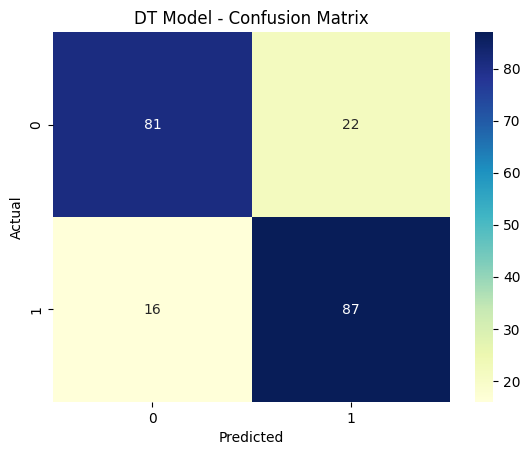

In [ ]:
sns.heatmap(conf_matrix_DT, annot=True, fmt='d', cmap='YlGnBu')
plt.title('DT Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Test ROC-AUC: 0.9040


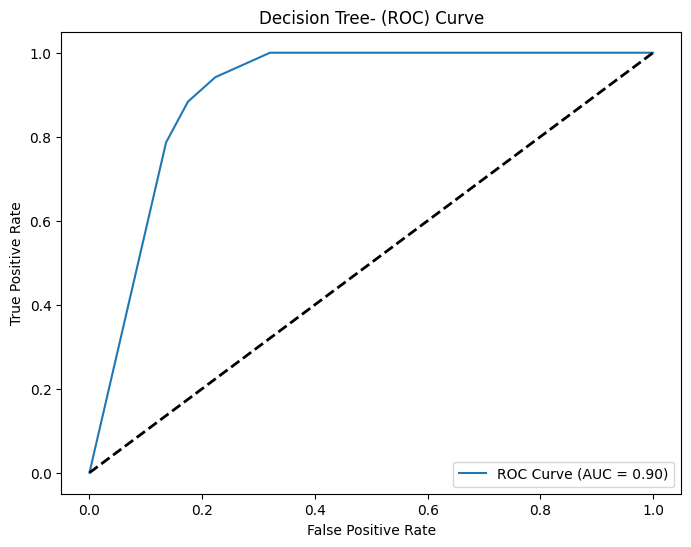

In [ ]:
predicted_probs_DT = model_for_dt.predict_proba(X_DT_train)[:, 1]

# Calculate ROC-AUC on the train set
roc_auc_train_DT = roc_auc_score(y_resampled, predicted_probs_DT)
print(f"Test ROC-AUC: {roc_auc_train_DT:.4f}")

# Calculate ROC curve on the train set
fpr_DT, tpr_DT, _ = roc_curve(y_resampled, predicted_probs_DT)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_DT, tpr_DT, label=f'ROC Curve (AUC = {roc_auc_train_DT:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree- (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Making predictions on the test set of the DT model
y_pred_test_DT = model_for_dt.predict(X_DT_test)

# Calculating metrics
accuracy_test_DT = accuracy_score(y_test, y_pred_test_DT)
precision_test_DT = precision_score(y_test, y_pred_test_DT)
recall_test_DT = recall_score(y_test, y_pred_test_DT)
f1_test_DT = f1_score(y_test, y_pred_test_DT)
conf_matrix_test_DT = confusion_matrix(y_test, y_pred_test_DT)

# Printing the evaluation metrics
print("DT Model - Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_DT))
print("Precision: {:.2f}".format(precision_test_DT))
print("Recall (Sensitivity): {:.2f}".format(recall_test_DT))
print("F1 Score: {:.2f}".format(f1_test_DT))
print("Confusion Matrix:")
print(conf_matrix_test_DT)



DT Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.78
Precision: 0.36
Recall (Sensitivity): 0.87
F1 Score: 0.51
Confusion Matrix:
[[76 23]
 [ 2 13]]


Test ROC-AUC: 0.8461


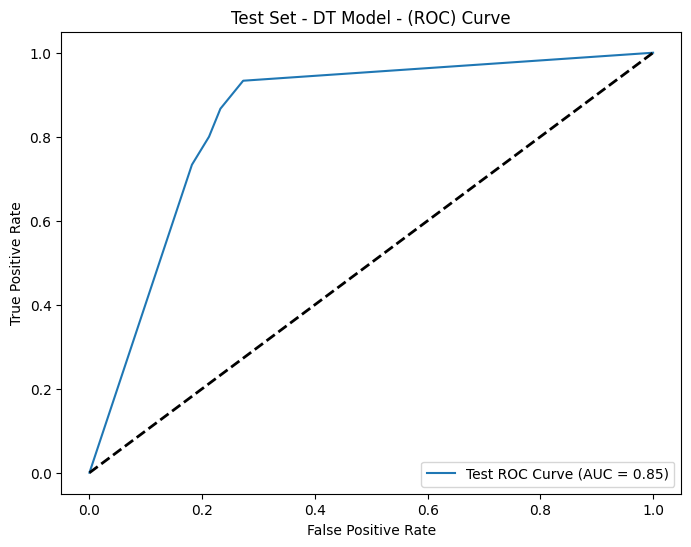

In [ ]:
# Making predictions on the test set of the DT model
predicted_probs_test_DT = model_for_dt.predict_proba(X_DT_test)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_DT = roc_auc_score(y_test, predicted_probs_test_DT)
print(f"Test ROC-AUC: {roc_auc_test_DT:.4f}")

# Calculate ROC curve on the test set
fpr_test_DT, tpr_test_DT, _ = roc_curve(y_test, predicted_probs_test_DT)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_DT, tpr_test_DT, label=f'Test ROC Curve (AUC = {roc_auc_test_DT:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set - DT Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

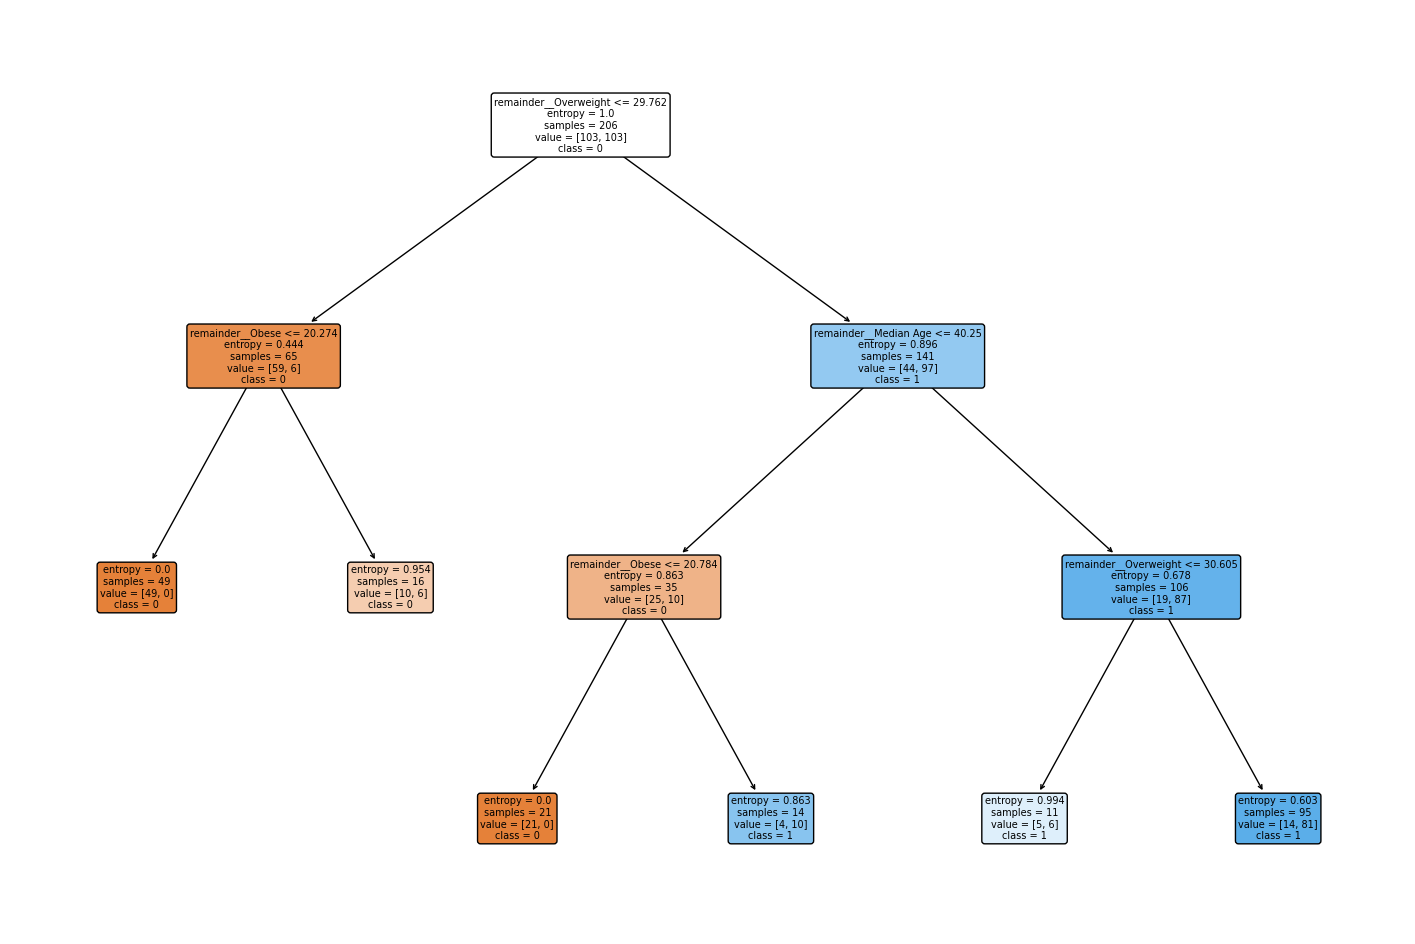

In [ ]:
plt.figure(figsize=(18, 12))
plot_tree(model_for_dt.named_steps['DT'], feature_names=X_DT_train.columns, class_names=['0', '1'], filled=True, rounded=True, fontsize=7)
plt.show()

**6.2 Random Forests**

In [ ]:
RF_model = RandomForestClassifier()

cv_RF = StratifiedKFold(5)
rfecv_RF = RFECV(
    estimator=RF_model,
    step=1,
    cv=cv_RF,
    scoring=accuracy_scoring,
    min_features_to_select=1,
)

rfecv_RF.fit(X_resampled, y_resampled)

# Print the optimal number of selected features
print(f"Optimal number of features -RF: {rfecv_RF.n_features_}")


Optimal number of features -RF: 10


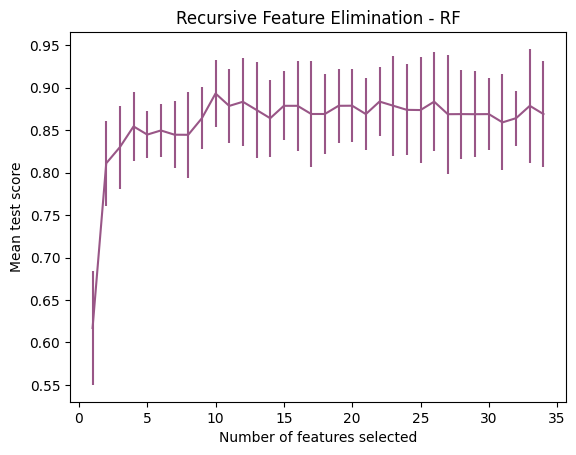

In [ ]:
# Calculate the number of different feature selections tested
n_scores_RF = len(rfecv_RF.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_RF + 1),
    rfecv_RF.cv_results_["mean_test_score"],
    yerr=rfecv_RF.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - RF")

# Show the plot
plt.show()

In [ ]:
selected_RF_features = X_resampled.columns[rfecv_RF.support_]

print("Selected Features for RF:")
print(selected_RF_features)

Selected Features for RF:
Index(['one_hot_encoder__Ethnic Concentration quintiles_2',
       'remainder__Rate of Daily Smokers', 'remainder__Median Age',
       'remainder__Rate of Active population',
       'remainder__Visible Minority Rate', 'remainder__Average Income',
       'remainder__Rented Rate', 'remainder__Active transportation',
       'remainder__Overweight', 'remainder__Obese'],
      dtype='object')


In [ ]:
# Accessing the mean test scores
mean_test_scores_RF = rfecv_RF.cv_results_["mean_test_score"]

# Printing the list of mean test scores along with the number of selected features
for r, score_RF in enumerate(mean_test_scores_RF):
    RF_selected_features = r + 1  #start with one feature
    print(f"Number of Selected Features: {RF_selected_features}, Mean Test Score: {score_RF}")

Number of Selected Features: 1, Mean Test Score: 0.6614285714285714
Number of Selected Features: 2, Mean Test Score: 0.728095238095238
Number of Selected Features: 3, Mean Test Score: 0.8257142857142856
Number of Selected Features: 4, Mean Test Score: 0.8747619047619046
Number of Selected Features: 5, Mean Test Score: 0.8647619047619047
Number of Selected Features: 6, Mean Test Score: 0.8542857142857143
Number of Selected Features: 7, Mean Test Score: 0.8833333333333334
Number of Selected Features: 8, Mean Test Score: 0.8642857142857142
Number of Selected Features: 9, Mean Test Score: 0.8452380952380951
Number of Selected Features: 10, Mean Test Score: 0.8542857142857143
Number of Selected Features: 11, Mean Test Score: 0.8933333333333333
Number of Selected Features: 12, Mean Test Score: 0.8642857142857144
Number of Selected Features: 13, Mean Test Score: 0.8738095238095239
Number of Selected Features: 14, Mean Test Score: 0.8647619047619047
Number of Selected Features: 15, Mean Test S

In [ ]:
rfe_RF = RFE(RF_model, n_features_to_select=4)
rfe_RF.fit(X_resampled, y_resampled)

#extracting features
most_important_features_RF = X_resampled.columns[rfe_RF.support_]



In [ ]:
most_important_features_RF

Index(['remainder__Median Age', 'remainder__Average Income',
       'remainder__Overweight', 'remainder__Obese'],
      dtype='object')

In [ ]:
RF_features = ['remainder__Median Age', 'remainder__Average Income',
       'remainder__Overweight', 'remainder__Obese']

In [ ]:
#fitting data
X_RF_train = X_resampled[RF_features]
X_RF_test = X_test[RF_features]

In [ ]:
# Initializing a Random Forest classifier
#we already have balanced class through the previous undersampling step
#thus, class weight will be set to none instead of balanced
rf = RandomForestClassifier(criterion='entropy', class_weight=None)

# Creating a pipeline that applies the Random Forest
model_for_rf = Pipeline([
    ('random_forest', rf)
])

# Fitting the model on the training data
model_for_rf.fit(X_RF_train, y_resampled)

Pipeline(steps=[('random_forest', RandomForestClassifier(criterion='entropy'))])

**6.2.1 Hyperparametre tunning for Random Forests**

In [ ]:
# Define the hyperparameter values that should be tested
param_dist_RF = {
    "random_forest__n_estimators" : [100, 150, 200,],
    "random_forest__max_depth" : [3, 5, 7, 10],
    "random_forest__min_samples_leaf" : [3, 5, 7, 10],
    "random_forest__max_features" : ['sqrt', 'log2']
}

# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_RF = GridSearchCV(
    model_for_rf, param_grid=param_dist_RF, cv=skf)

# Train Grid Search on the training data
random_search_RF.fit(X_RF_train, y_resampled)

# Extract results into a DataFrame
results_RF = pd.DataFrame(random_search_RF.cv_results_)

# Display the set of parameters that achieved the best score
results_RF[results_RF['rank_test_score'] == 1]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.228781,0.007532,0.009468,0.000578,3,log2,3,150,"{'random_forest__max_depth': 3, 'random_forest...",0.833333,0.95122,0.853659,0.853659,0.902439,0.878862,0.042743,1


In [ ]:
# Retrieve the best hyperparameters after Grid Search for RF
random_search_RF.best_params_

{'random_forest__max_depth': 3,
 'random_forest__max_features': 'log2',
 'random_forest__min_samples_leaf': 3,
 'random_forest__n_estimators': 150}

In [ ]:
# Update the model's hyperparameters to the best found during Grid Search
model_for_rf = model_for_rf.set_params(random_forest__max_depth = 3, random_forest__max_features = 'log2', random_forest__min_samples_leaf = 3, random_forest__n_estimators = 150)


# Refit the model using the training data
model_for_rf = model_for_rf.fit(X_RF_train, y_resampled)

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_RF_model = cross_val_predict(model_for_rf, X_RF_train, y_resampled, cv=5)

# Calculating the full confusion matrix
conf_matrix_RF = confusion_matrix(y_resampled, predicted_labels_RF_model)

# Calculate the full classification report
class_report_RF = classification_report(y_resampled, predicted_labels_RF_model)

# Calculate accuracy
accuracy_RF = accuracy_score(y_resampled, predicted_labels_RF_model)

# Calculate precision
precision_RF = precision_score(y_resampled, predicted_labels_RF_model)

# Calculate recall
recall_RF = recall_score(y_resampled, predicted_labels_RF_model)

# Calculate F1 score
f1_RF = f1_score(y_resampled, predicted_labels_RF_model)


# Print the full confusion matrix and classification report
print("RF Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_RF)
print("B. Classification Report:")
print(class_report_RF)
print("C. Accuracy: {:.2f}".format(accuracy_RF))
print("D. Precision: {:.2f}".format(precision_RF))
print("E. Recall (Sensitivity): {:.2f}".format(recall_RF))
print("F. F1 Score: {:.2f}".format(f1_RF))

RF Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[80 23]
 [ 5 98]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       103
           1       0.81      0.95      0.87       103

    accuracy                           0.86       206
   macro avg       0.88      0.86      0.86       206
weighted avg       0.88      0.86      0.86       206

C. Accuracy: 0.86
D. Precision: 0.81
E. Recall (Sensitivity): 0.95
F. F1 Score: 0.87


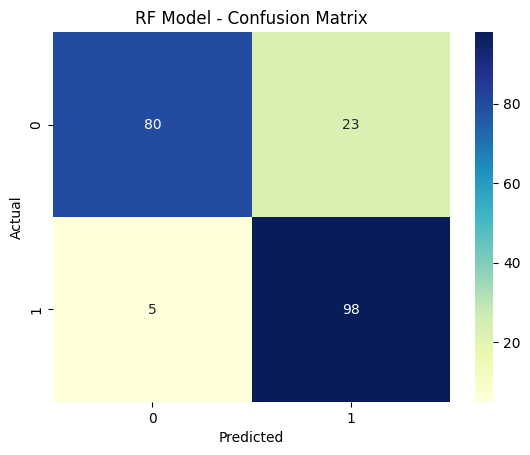

In [ ]:
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='YlGnBu')
plt.title('RF Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Test ROC-AUC: 0.9627


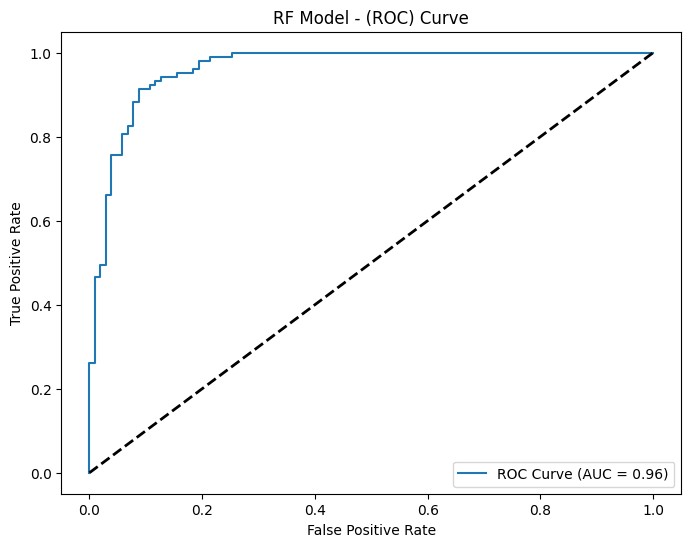

In [ ]:
predicted_probs_RF = model_for_rf.predict_proba(X_RF_train)[:, 1]  # probability of 1 (outcome)

# Calculate ROC-AUC
roc_auc_train_RF = roc_auc_score(y_resampled, predicted_probs_RF)
print(f"Test ROC-AUC: {roc_auc_train_RF:.4f}")

# Calculate ROC curve
fpr_RF, tpr_RF, _ = roc_curve(y_resampled, predicted_probs_RF)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_RF, tpr_RF, label=f'ROC Curve (AUC = {roc_auc_train_RF:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Making predictions on the test set of the RF model
y_pred_test_RF = model_for_rf.predict(X_RF_test)

# Calculating metrics
accuracy_test_RF = accuracy_score(y_test, y_pred_test_RF)
precision_test_RF = precision_score(y_test, y_pred_test_RF)
recall_test_RF = recall_score(y_test, y_pred_test_RF)
f1_test_RF = f1_score(y_test, y_pred_test_RF)
conf_matrix_test_RF = confusion_matrix(y_test, y_pred_test_RF)

# Printing the evaluation metrics
print("Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_RF))
print("Precision: {:.2f}".format(precision_test_RF))
print("Recall (Sensitivity): {:.2f}".format(recall_test_RF))
print("F1 Score: {:.2f}".format(f1_test_RF))
print("Confusion Matrix:")
print(conf_matrix_test_RF)

Test Set- Confusion Matrix/Classification Report
Accuracy: 0.81
Precision: 0.39
Recall (Sensitivity): 0.87
F1 Score: 0.54
Confusion Matrix:
[[79 20]
 [ 2 13]]


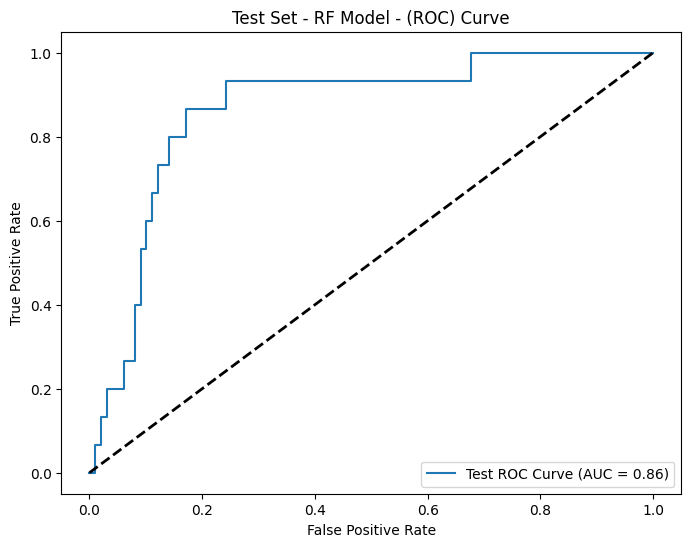

In [ ]:
# Making predictions on the test set of the RF model
predicted_probs_test_RF = model_for_rf.predict_proba(X_RF_test)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_RF = roc_auc_score(y_test, predicted_probs_test_RF)

# Calculate ROC curve on the test set
fpr_test_RF, tpr_test_RF, _ = roc_curve(y_test, predicted_probs_test_RF)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_RF, tpr_test_RF, label=f'Test ROC Curve (AUC = {roc_auc_test_RF:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set - RF Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**6.3 XGBOOST**

In [ ]:
xgb_model = GradientBoostingClassifier()

cv_xgb = StratifiedKFold(5)

rfecv_xgb = RFECV(
    estimator=xgb_model,
    step=1,
    cv=cv_xgb,
    scoring=accuracy_scoring,
    min_features_to_select=1,
)

rfecv_xgb.fit(X_resampled, y_resampled)

# Print the optimal number of selected features
print(f"Optimal number of features (XGB): {rfecv_xgb.n_features_}")

Optimal number of features (XGB): 7


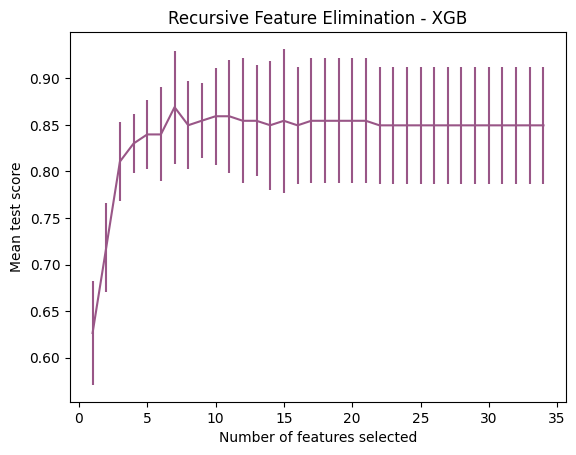

In [ ]:
# Calculate the number of different feature selections tested
n_scores_XGB = len(rfecv_xgb.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_XGB + 1),
    rfecv_xgb.cv_results_["mean_test_score"],
    yerr=rfecv_xgb.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - XGB")

# Show the plot
plt.show()

In [ ]:
selected_xgb_features = [i for i in X_resampled.columns[rfecv_xgb.support_]]

print("Selected Features for XGB:")
print(selected_xgb_features)

Selected Features for XGB:
['remainder__Rate of Daily Smokers', 'remainder__Median Age', 'remainder__Recent Immigrant Rate', 'remainder__Visible Minority Rate', 'remainder__Active transportation', 'remainder__Overweight', 'remainder__Obese']


In [ ]:
# Accessing the mean test scores
mean_test_scores_xgb = rfecv_xgb.cv_results_["mean_test_score"]

# Printing the list of mean test scores along with the number of selected features
for t, score_xgb in enumerate(mean_test_scores_xgb):
    xgb_selected_features = t + 1  #start with one feature
    print(f"Number of Selected Features: {xgb_selected_features}, Mean Test Score: {score_xgb}")

Number of Selected Features: 1, Mean Test Score: 0.6265969802555169
Number of Selected Features: 2, Mean Test Score: 0.718350754936121
Number of Selected Features: 3, Mean Test Score: 0.8105691056910569
Number of Selected Features: 4, Mean Test Score: 0.8299651567944251
Number of Selected Features: 5, Mean Test Score: 0.8397212543554007
Number of Selected Features: 6, Mean Test Score: 0.8397212543554007
Number of Selected Features: 7, Mean Test Score: 0.8689895470383275
Number of Selected Features: 8, Mean Test Score: 0.8495934959349594
Number of Selected Features: 9, Mean Test Score: 0.8544715447154472
Number of Selected Features: 10, Mean Test Score: 0.8592334494773519
Number of Selected Features: 11, Mean Test Score: 0.8592334494773519
Number of Selected Features: 12, Mean Test Score: 0.8543554006968641
Number of Selected Features: 13, Mean Test Score: 0.8543554006968641
Number of Selected Features: 14, Mean Test Score: 0.8495934959349594
Number of Selected Features: 15, Mean Test S

In [ ]:
#setting parametres
rfe_xgb = RFE(xgb_model, n_features_to_select=7)
rfe_xgb.fit(X_resampled, y_resampled)

#extracting features
most_important_features_XGB = X_resampled.columns[rfe_xgb.support_]

In [ ]:
most_important_features_XGB

Index(['remainder__Rate of Daily Smokers', 'remainder__Median Age',
       'remainder__Recent Immigrant Rate', 'remainder__Visible Minority Rate',
       'remainder__Active transportation', 'remainder__Overweight',
       'remainder__Obese'],
      dtype='object')



6.2 Hyperparametre tunning for XGBoost


In [ ]:
xgb_features = ['remainder__Rate of Daily Smokers', 'remainder__Median Age',
       'remainder__Recent Immigrant Rate', 'remainder__Visible Minority Rate',
       'remainder__Active transportation', 'remainder__Overweight',
       'remainder__Obese']

In [ ]:
X_XGB_train = X_resampled[xgb_features]
X_XGB_test = X_test[xgb_features]

In [ ]:
# Initializing the Gradient Boosting model with initial parameters
xgb = GradientBoostingClassifier()

# Creating a pipeline that first applies the column transformations and then runs the Gradient Boosting model
model_for_xgb = Pipeline([
    ('xg_boost', xgb)
])

# Fitting the model on the training data
model_for_xgb.fit(X_XGB_train, y_resampled)

Pipeline(steps=[('xg_boost', GradientBoostingClassifier())])

**6.3.1 Hyperparametre tunning for XGB**

In [ ]:
### Hyperparameter tuning using GridSearchCV
param_dist_xgb = {
    "xg_boost__n_estimators" : [50, 100, 150, 200],
    "xg_boost__max_depth" : [3, 5, 7, 9],
    "xg_boost__min_samples_leaf" : [3, 5, 7, 10],
    "xg_boost__learning_rate" : [.1]
}

# Using StratifiedKFold for cross-validation, ensuring each fold has the same proportion of observations with each target value
skf = StratifiedKFold(n_splits=5)

# Setting up the GridSearchCV to find the best hyperparameters for the Gradient Boosting model
random_search_xgb = GridSearchCV(
    model_for_xgb, param_grid=param_dist_xgb, cv=skf
)

# Fitting the GridSearchCV on the training data
random_search_xgb.fit(X_XGB_train, y_resampled)

# Extract results into a DataFrame
results_xgb = pd.DataFrame(random_search_xgb.cv_results_)

# Display the set of parameters that achieved the best score
results_xgb[results_xgb['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xg_boost__learning_rate,param_xg_boost__max_depth,param_xg_boost__min_samples_leaf,param_xg_boost__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.323075,0.006874,0.004182,0.000795,0.1,5,5,150,"{'xg_boost__learning_rate': 0.1, 'xg_boost__ma...",0.857143,0.97561,0.853659,0.829268,0.926829,0.888502,0.054338,1


In [ ]:
# Retrieve the best hyperparameters after Grid Search for RF
random_search_xgb.best_params_

{'xg_boost__learning_rate': 0.1,
 'xg_boost__max_depth': 5,
 'xg_boost__min_samples_leaf': 5,
 'xg_boost__n_estimators': 150}

In [ ]:
# Update the model's hyperparameters to the best found during Grid Search
model_for_xgb = model_for_xgb.set_params(xg_boost__n_estimators = 150, xg_boost__max_depth = 5, xg_boost__min_samples_leaf = 5, xg_boost__learning_rate = 0.1)


# Refit the model using the training data
model_for_xgb = model_for_xgb.fit(X_XGB_train, y_resampled)

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_xgb_model = cross_val_predict(model_for_xgb, X_XGB_train, y_resampled, cv=5)

# Calculating the full confusion matrix
conf_matrix_xgb = confusion_matrix(y_resampled, predicted_labels_xgb_model)

# Calculate the full classification report
class_report_xgb = classification_report(y_resampled, predicted_labels_xgb_model)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_resampled, predicted_labels_xgb_model)

# Calculate precision
precision_xgb = precision_score(y_resampled, predicted_labels_xgb_model)

# Calculate recall
recall_xgb = recall_score(y_resampled, predicted_labels_xgb_model)

# Calculate F1 score
f1_xgb = f1_score(y_resampled, predicted_labels_xgb_model)


# Print the full confusion matrix and classification report
print("XGB Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_xgb)
print("B. Classification Report:")
print(class_report_xgb)
print("C. Accuracy: {:.2f}".format(accuracy_xgb))
print("D. Precision: {:.2f}".format(precision_xgb))
print("E. Recall (Sensitivity): {:.2f}".format(recall_xgb))
print("F. F1 Score: {:.2f}".format(f1_xgb))

XGB Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[81 22]
 [14 89]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       103
           1       0.80      0.86      0.83       103

    accuracy                           0.83       206
   macro avg       0.83      0.83      0.82       206
weighted avg       0.83      0.83      0.82       206

C. Accuracy: 0.83
D. Precision: 0.80
E. Recall (Sensitivity): 0.86
F. F1 Score: 0.83


Test ROC-AUC: 1.0000


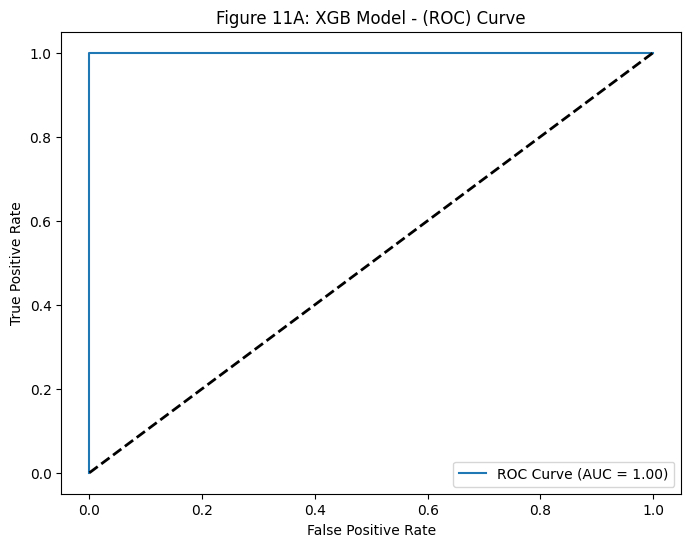

In [ ]:
predicted_probs_xgb = model_for_xgb.predict_proba(X_XGB_train)[:, 1]

# Calculate ROC-AUC
roc_auc_xgb = roc_auc_score(y_resampled, predicted_probs_xgb)
print(f"Test ROC-AUC: {roc_auc_xgb:.4f}")

# Calculate ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_resampled, predicted_probs_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 11A: XGB Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Making predictions on the test set of the RF model
y_pred_test_xgb = model_for_xgb.predict(X_XGB_test)

# Calculating metrics
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
precision_test_xgb = precision_score(y_test, y_pred_test_xgb)
recall_test_xgb = recall_score(y_test, y_pred_test_xgb)
f1_test_xgb = f1_score(y_test, y_pred_test_xgb)
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

# Printing the evaluation metrics
print("XGB Model - Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_xgb))
print("Precision: {:.2f}".format(precision_test_xgb))
print("Recall (Sensitivity): {:.2f}".format(recall_test_xgb))
print("F1 Score: {:.2f}".format(f1_test_xgb))
print("Confusion Matrix:")
print(conf_matrix_test_xgb)

XGB Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.84
Precision: 0.44
Recall (Sensitivity): 0.80
F1 Score: 0.57
Confusion Matrix:
[[84 15]
 [ 3 12]]


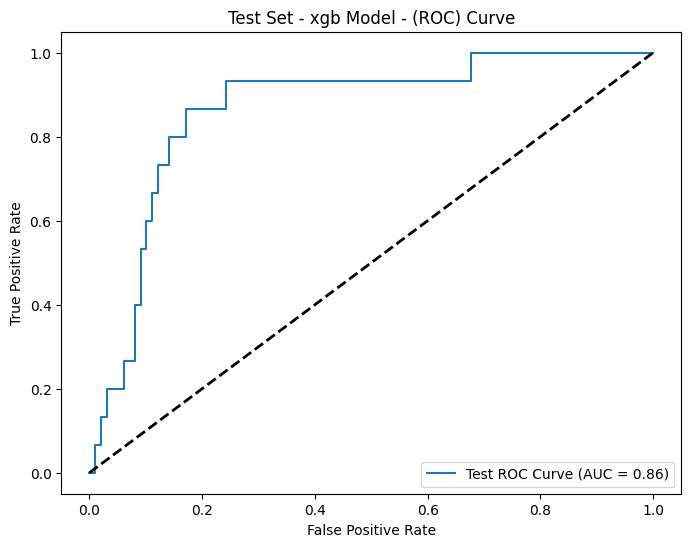

In [ ]:
# Making predictions on the test set of the RF model
predicted_probs_test_xgb = model_for_rf.predict_proba(X_RF_test)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_xgb = roc_auc_score(y_test, predicted_probs_test_xgb)

# Calculate ROC curve on the test set
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, predicted_probs_test_xgb)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f'Test ROC Curve (AUC = {roc_auc_test_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set - xgb Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Summary

**Section 7: Summary of models**

**7.1 Evaluations**

In [ ]:
# setting evaluations
evaluations = {
    'Model': ['LR Training', 'LR Test', 'KNN Training', 'KNN Test', 'SVM Training', 'SVM Test', 'DT Training', 'DT Test', 'RF Training', 'RF Test', 'XGB train', 'XGB test'],
    'Accuracy': [accuracy_LR, accuracy_test_LR, accuracy_knn, accuracy_test_knn, accuracy_SVM, accuracy_test_SVM, accuracy_DT, accuracy_test_DT, accuracy_RF, accuracy_test_RF, accuracy_xgb, accuracy_test_xgb],
    'Precision': [precision_LR, precision_test_LR, precision_knn, precision_test_knn, precision_SVM, precision_test_SVM, precision_DT, precision_test_DT, precision_RF, precision_test_RF, precision_xgb, precision_test_xgb],
    'Recall (Sensitivity)': [recall_LR, recall_test_LR, recall_knn, recall_test_knn, recall_SVM, recall_test_SVM, recall_DT, recall_test_DT, recall_RF, recall_test_RF, recall_xgb, recall_test_xgb],
    'F1 Score': [f1_LR, f1_test_LR, f1_knn, f1_test_knn, f1_SVM, f1_test_SVM, f1_DT, f1_test_DT, f1_RF, f1_test_RF, f1_xgb, f1_test_xgb]
}

# Creating a DataFrame
results_summary = pd.DataFrame(evaluations)

# Displaying the combined evaluation results
print(results_summary)

           Model  Accuracy  Precision  Recall (Sensitivity)  F1 Score
0    LR Training  0.873786   0.840708              0.922330  0.879630
1        LR Test  0.824561   0.428571              1.000000  0.600000
2   KNN Training  0.849515   0.810345              0.912621  0.858447
3       KNN Test  0.859649   0.482759              0.933333  0.636364
4   SVM Training  0.849515   0.800000              0.932039  0.860987
5       SVM Test  0.807018   0.405405              1.000000  0.576923
6    DT Training  0.815534   0.798165              0.844660  0.820755
7        DT Test  0.780702   0.361111              0.866667  0.509804
8    RF Training  0.864078   0.809917              0.951456  0.875000
9        RF Test  0.807018   0.393939              0.866667  0.541667
10     XGB train  0.825243   0.801802              0.864078  0.831776
11      XGB test  0.842105   0.444444              0.800000  0.571429


**7.2 ROC curves**

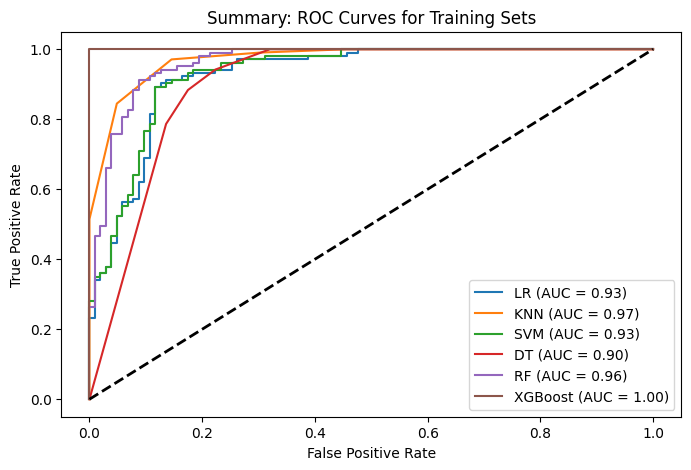

In [ ]:
# Creating a figure
plt.figure(figsize=(8, 5))

# Plotting the ROC curves for training sets (all models)
plt.title('Summary: ROC Curves for Training Sets')
plt.plot(fpr_LR, tpr_LR, label=f'LR (AUC = {roc_auc_train_LR:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_SVM, tpr_SVM, label=f'SVM (AUC = {roc_auc_train_SVM:.2f})')
plt.plot(fpr_DT, tpr_DT, label=f'DT (AUC = {roc_auc_train_DT:.2f})')
plt.plot(fpr_RF, tpr_RF, label=f'RF (AUC = {roc_auc_train_RF:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Display the graph
plt.show()


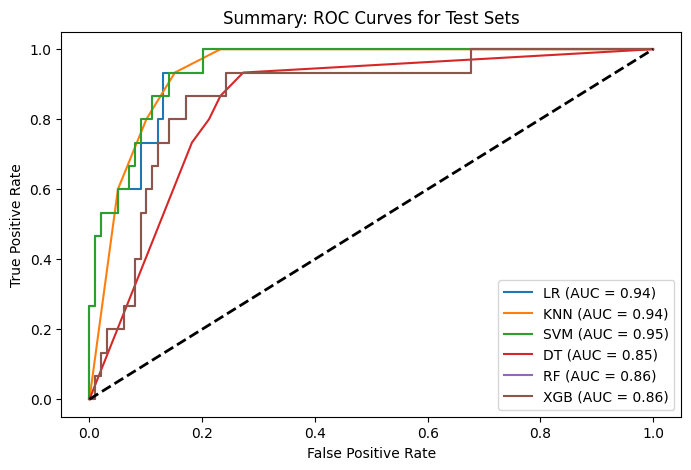

In [ ]:
# Creating a figure
plt.figure(figsize=(8, 5))

# Plotting the ROC curves for training sets (all models)
plt.title('Summary: ROC Curves for Test Sets')
plt.plot(fpr_test_LR, tpr_test_LR, label=f'LR (AUC = {roc_auc_test_LR:.2f})')
plt.plot(fpr_test_knn, tpr_test_knn, label=f'KNN (AUC = {roc_auc_test_knn:.2f})')
plt.plot(fpr_test_SVM, tpr_test_SVM, label=f'SVM (AUC = {roc_auc_test_SVM:.2f})')
plt.plot(fpr_test_DT, tpr_test_DT, label=f'DT (AUC = {roc_auc_test_DT:.2f})')
plt.plot(fpr_test_RF, tpr_test_RF, label=f'RF (AUC = {roc_auc_test_RF:.2f})')
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f'XGB (AUC = {roc_auc_test_xgb:.2f})')

# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Display the graph
plt.show()

In [ ]:
print("Number of Selected Features by Model")
features_table_summary = pd.DataFrame(columns=["Model", "Number of Features"])
features_table_summary.loc[len(features_table_summary)] = "LR", len(LR_features)
features_table_summary.loc[len(features_table_summary)] = "DT", len(DT_features)
features_table_summary.loc[len(features_table_summary)] = "RF", len(RF_features)
features_table_summary.loc[len(features_table_summary)] = "XGB", len(xgb_features)
print(features_table_summary)

Number of Selected Features by Model
  Model  Number of Features
0    LR                   4
1    DT                   4
2    RF                   4
3   XGB                   7


In [ ]:
counted = dict(Counter(LR_features+DT_features+RF_features+xgb_features))
overall_features = [i for i in counted.keys()]
overall_counts = [i for i in counted.values()]

print(f"The following variables were used most frequently, in {max(overall_counts):.0f} models:")
for i in range(len(overall_counts)):
  if overall_counts[i] == max(overall_counts):
    print(overall_features[i])

The following variables were used most frequently, in 4 models:
remainder__Overweight
remainder__Obese
